<center>
<h4>Diplomatura en CDAAyA 2020 - FaMAF - UNC</h4>
<h1>¿Caro o Barato? Análisis de Precios de Almacen en un Contexto Inflacionario</h1>
<h3>Exploración y Curación</h3>
</center>
</left>
<h4>Sofía Luján y Julieta Bergamasco</h4>
</left>

__[Proyecto para Mentoría](https://sites.google.com/view/mentorias2020-diplodatos/caro-o-barato-an%C3%A1lisis-de-precios-de-almac%C3%A9n-en-un-contexto-inflacionari?authuser=0)__


### Introducción

En la siguiente notebook, se presentará la consigna a seguir para el segundo práctico de la materia Exploración y Curación. El objetivo consiste en identificar e implementar los pasos necesarios para la limpieza de la base de datos, así como también analizar cruces de datos con mayor profundidad y validando el sentido lógico. Para ello, comenzaremos con las importaciones pertinentes.

### Importaciones

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
# Importación de las librerías necesarias
import numpy as np
import pandas as pd
from io import StringIO
# Puede que nos sirvan también
import matplotlib as mpl
mpl.get_cachedir()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import sys
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
#nltk.download('punkt')
import re
from collections import Counter

#if 'swifter' not in sys.modules:
#        !pip install -q swifter
        
import swifter

In [3]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
pd.set_option('max_colwidth', 151)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Consigna para Curación y Exploración del Dataset

### I. Rutina de Curación

Inicialmente, con el objetivo de preparar los datos que alimentarán futuros modelos de aprendizaje automático (ML), se propone seguir la siguiente __[checklist](https://dimewiki.worldbank.org/wiki/Checklist:_Data_Cleaning)__ para la limpieza de los datos de nuestro proyecto. Esta _checklist_ es la misma que utilizaron en el primer práctico de la materia y nos será de utilidad como guía para curar el dataset. A modo de ayuda, **en esta notebook encontrarán una especie de template** que sigue la _checklist_ y que deberán ir completando. **Cada decisión tomada deberá quedar registrada de manera explícita y clara.**

A los fines de realizar este práctico, se utilizará el dataset original. Es decir, por un lado, los 5 archivos de precios (que sí podemos unirlos para hacer la limpieza, ya que tienen la misma estructura), y, por otro lado, el txt de sucursales y el txt de productos. Cerca del final del procesamiento, se realizará el mismo join aplicado para obtener el dataset completo, con la misma estructura que el que utilizaron en el práctico de A&V. Además, se crearán nuevas features cuando lo consideren pertinente.

Recuerden que la ciencia de datos es un **proceso circular y continuo, no lineal**. Es decir, si los datos requieren de mayor procesamiento para satisfacer las necesidades de algoritmos de ML (cualesquiera de ellos), vamos a volver a la etapa inicial para, por ejemplo, crear nuevas features, tomar decisiones diferentes sobre valores faltantes o valores atípicos (outliers), descartar features, entre otras.

### II. Análisis en Profundidad del Contenido

Una vez aplicada la _Checklist_, lo que vamos a hacer es profundizar aún más el análisis y tomar decisiones que se consideren pertinentes, si es que no lo han hecho aún en el desarrollo del primer apartado. Por supuesto, se deberán registrar todas las decisiones que tomen al respecto.

Al finalizar con el práctico, las preguntas o consignas listadas a continuación deberán quedar respondidas, mientras que si ya lo hicieron durante el desarrollo de la _checklist_, el objetivo es que se replanteen las decisiones tomadas al respecto:

1. Todas las variables tienen el tipo apropiado? Analizar las features con tipo `Objeto`. Qué decisiones tomarán al respecto?

2. Todos los `producto_id` en el dataset de precios se encuentran en la entidad de productos? Tomamos decisiones al respecto?

3. Todos los `sucursal_id` en el dataset de precios se encuentran en la entidad de sucursales? Tomamos decisiones al respecto?

4. Cuántos precios reporta cada sucursal? Todas las sucursales reportan precios en todas las fechas?

Gran parte (la mayoría) de las variables del dataset son categóricas y podemos trabajar muchas features antes de unir los datos.

5. En el dataset de **productos**:

    5.1. `presentacion`: a partir de esta característica, crear nuevas columnas que separen `cantidad` y `um`. Homogeneizar unidades de medida, al máximo posible, y crear nueva columna para indicar `um_homogenea` y el `factor` que sería necesario para homogeneizar el precio de esa presentación. A partir de `um_homogenea`, crear variables dummies (_Tip: Pueden usar pd.get_dummies()_).

    5.2. `nombre`: crear una nueva columna con el `nombre_depurado`. Esto es, llevar todo a minúsculas, quitar signos de puntuación, quitar unidad de medida, identificar dígitos numéricos. Utilizando esta columna, `nombre_depurado`, tokenizar los nombres y obtener las palabras más fecuentes. Eliminar palabras muy frecuentes en nombres que no nos dicen nada (‘de’, ‘en’, ‘con’, ‘para’, ‘la’, ‘el’, ‘&’, etc.). Convertir las **n** palabras más frecuentes en dummies. **n** es una decisión que deberán adoptar (_Tip: Pueden usar Series.str.find()_). Evaluar la posibilidad de crear una dummy `otras_palabras`, para aquellos nombres que contienen palabras poco frecuentes no incluidas.

    5.3. `marca`: obtener las **n** marcas más frecuentes y crear un nuevo campo 'marca_frecuente' que tenga la marca original si es de las más frecuentes y la categoría `OTRA` para aquellas menos frecuentes. Crear dummies a partir de este campo. _(Una opción viable podría ser unir el nombre con la marca en un campo y luego depurar las palabras duplicadas que queden en el nombre+marca. Cualquier otra técnica que se les ocurra puede ser válida)_

6. En el dataset de **sucursales**:

    6.1. `provincia` o `nom_provincia`: a partir de esta característica, crear las variables dummies correspondientes.

    6.2. `tipoSucursal`: a partir de esta característica, crear las variables dummies correspondientes.

    6.3. `banderaDescripcion`: a partir de esta característica, crear las variables dummies correspondientes. La misma descripción de sucursal tiene siempre el mismo tipo? En qué afecta esto?

7. Unir los precios con las entidades de productos y sucursales para obtener un dataset unificado y limpio. A partir del `precio` y del `factor`, crear el `precio_homogeneo`. **Volver a analizar outliers.**

8. Crear el `precio_relativo`, de acuerdo al producto seleccionado y la metodología implementada en el práctico de A&V.

Esta lista es extensa e intenta abarcar todas las posibles irregularidades en los datos, pero puede no ser exhaustiva. **Cualquier análisis adicional de consistencia que deseen agregar porque lo consideran pertinente, será bienvenido y valorado.**

Luego de pasar por todos los puntos de la _checklist_ propuesta y las consignas, deberán **almacenar en un nuevo archivo los datos resultantes luego de hacer los joins correspondientes**.

### Entregables

Los entregables de este práctico consisten en:
- **Esta misma Notebook, pero con la _checklist_ aplicada y el análisis de contenido completo**, explicando las decisiones tomadas en cada etapa.
- Además, deberán elaborar un **script** que contenga una función (o varias) para curar nuevos datos con la misma estructura.
- Finalmente, resumir las principales decisiones y conclusiones en un **documento de texto** (como para ir completando el informe, que formará parte de la presentación final).

**Fecha de Entrega: 27/07**

# Resolución

## I. Rutina de Curación

### 1. Importación de Datos

#### 1.1. Verificación de Inexistencia de Problemas en la Importación

Para comenzar, importamos los datos que vamos a procesar:

In [4]:
# Por un lado, cargamos los precios y los unimos en un único dataframe
precios_20200412_20200413 = pd.read_csv('https://raw.githubusercontent.com/solujan/mentoria_2020/master/raw_dataset/precios_20200412_20200413.csv')
precios_20200419_20200419 = pd.read_csv('https://raw.githubusercontent.com/solujan/mentoria_2020/master/raw_dataset/precios_20200419_20200419.csv')
precios_20200426_20200426 = pd.read_csv('https://raw.githubusercontent.com/solujan/mentoria_2020/master/raw_dataset/precios_20200426_20200426.csv')
precios_20200502_20200503 = pd.read_csv('https://raw.githubusercontent.com/solujan/mentoria_2020/master/raw_dataset/precios_20200502_20200503.csv')
precios_20200518_20200518 = pd.read_csv('https://raw.githubusercontent.com/solujan/mentoria_2020/master/raw_dataset/precios_20200518_20200518.csv')

lista_df_px = [precios_20200412_20200413, precios_20200419_20200419, precios_20200426_20200426,
 precios_20200502_20200503, precios_20200518_20200518]
fecha_px = ['20200412', '20200419', '20200426', '20200502', '20200518']

precios = pd.DataFrame()
for df, fecha in zip(lista_df_px, fecha_px):
    df['fecha'] = fecha
    precios = pd.concat([precios,df])

precios.head()

,precio,producto_id,sucursal_id,fecha
0,29.90,0000000001663,2-1-014,20200412
1,29.90,0000000002288,2-1-032,20200412
2,39.90,0000000002288,2-1-096,20200412
3,499.99,0000000205870,9-1-686,20200412
4,519.99,0000000205870,9-2-248,20200412


In [5]:
precios.shape

(2222418, 4)

In [6]:
# Cargamos los txt de productos y sucursales, para tener la información de cada campo
producto_url = 'https://raw.githubusercontent.com/solujan/mentoria_2020/master/raw_dataset/productos.csv'
productos = pd.read_csv(producto_url)
sucursal_url = 'https://raw.githubusercontent.com/solujan/mentoria_2020/master/raw_dataset/sucursales.csv'
sucursales = pd.read_csv(sucursal_url)

In [7]:
# A las sucursales, le agregamos la descripción de la provincia y la región
provincia_txt = """
provincia	nom_provincia	region
AR-A	Salta	Norte Grande
AR-B	Provincia de Buenos Aires	Centro
AR-C	Ciudad Autónoma de Buenos Aires	Centro
AR-D	San Luis	Cuyo
AR-E	Entre Ríos	Centro
AR-F	La Rioja	Cuyo
AR-G	Santiago del Estero	Norte Grande
AR-H	Chaco	Norte Grande
AR-J	San Juan	Cuyo
AR-K	Catamarca	Norte Grande
AR-L	La Pampa	Centro
AR-M	Mendoza	Cuyo
AR-N	Misiones	Norte Grande
AR-P	Formosa	Norte Grande
AR-Q	Neuquén	Patagonia
AR-R	Río Negro	Patagonia
AR-S	Santa Fe	Centro
AR-T	Tucumán	Norte Grande
AR-U	Chubut	Patagonia
AR-V	Tierra del Fuego	Patagonia
AR-W	Corrientes	Norte Grande
AR-X	Córdoba	Centro
AR-Y	Jujuy	Norte Grande
AR-Z	Santa Cruz	Patagonia
"""
provincia_csv = StringIO(provincia_txt)
entidad_provincia = pd.read_csv(provincia_csv, sep=('\t'))
sucursales = sucursales.merge(entidad_provincia, on = 'provincia')

In [8]:
sucursales.head()

,id,comercioId,banderaId,banderaDescripcion,comercioRazonSocial,provincia,localidad,direccion,lat,lng,sucursalNombre,sucursalTipo,nom_provincia,region
0,1-1-7,1,1,Super MAMI,Dinosaurio S.A.,AR-X,SALSIPUEDES,E53 1011 None,-31.13,-64.30,Super Mami 4,Hipermercado,Córdoba,Centro
1,10-1-24,10,1,Hipermercado Carrefour,INC S.A.,AR-X,Jardin Espinoza,Av. O'Higgins 3765,-31.46,-64.17,Córdoba Jardín,Hipermercado,Córdoba,Centro
2,10-1-50,10,1,Hipermercado Carrefour,INC S.A.,AR-X,Quintas de Arguello,Recta Martinolli 7850,-31.35,-64.27,Córdoba Recta Martinolli,Hipermercado,Córdoba,Centro
3,10-1-54,10,1,Hipermercado Carrefour,INC S.A.,AR-X,Villa Allende Lomas,Av. Río De Janeiro 1787,-31.30,-64.28,Córdoba Villa Allende,Hipermercado,Córdoba,Centro
4,10-1-9,10,1,Hipermercado Carrefour,INC S.A.,AR-X,Villa Urquiza,Av. Colón 4880,-31.39,-64.24,Córdoba Colon,Hipermercado,Córdoba,Centro


In [9]:
sucursales.shape

(2333, 14)

In [10]:
productos.head()

,id,marca,nombre,presentacion,categoria1,categoria2,categoria3
0,0000000001663,LA ANÓNIMA,Radicheta Atada La Anonima 1 Un,1.0 un,NaN,NaN,NaN
1,0000000002288,LA ANÓNIMA,Perejil Atado La Anonima 1 Un,1.0 un,NaN,NaN,NaN
2,0000000205870,SIN MARCA,Ojo de Bife 1 Kg,1.0 kg,NaN,NaN,NaN
3,0000000205894,SIN MARCA,Milanesa de Peceto Novillito 1 Kg,1.0 kg,NaN,NaN,NaN
4,0000000205955,SIN MARCA,Chiquizuela Novillito 1 Kg,1.0 kg,NaN,NaN,NaN


In [11]:
productos.shape

(72038, 7)

Tomamos una muestra aleatoria para ver valores más dispersos.

In [12]:
# Fijar seed para asegurar reproducibilidad
np.random.seed(0)
productos.sample(5)

,id,marca,nombre,presentacion,categoria1,categoria2,categoria3
4441,10-3-2302046000005,SIN MARCA,Picada Comun 1 Kg,1.0 kg,NaN,NaN,NaN
35358,7791351130906,EL PEONCITO,Mix Frutas Secas El Peoncito 250 Gr,250.0 gr,NaN,NaN,NaN
23477,7790360967824,SWIFT,Milanesa de Soja Prefrita Swift 4 Un,4.0 un,NaN,NaN,NaN
49260,7794980938240,YUSPE,Condimento para Arroz Yuspe 25 Gr,25.0 gr,NaN,NaN,NaN
4231,10-2-2308124000004,SIN MARCA,Papa Negra 1 Kg,1.0 kg,NaN,NaN,NaN


Veamos los tipos de datos que tenemos

In [13]:
precios.dtypes

precio         float64
producto_id     object
sucursal_id     object
fecha           object
dtype: object

In [14]:
sucursales.dtypes

id                      object
comercioId               int64
banderaId                int64
banderaDescripcion      object
comercioRazonSocial     object
provincia               object
localidad               object
direccion               object
lat                    float64
lng                    float64
sucursalNombre          object
sucursalTipo            object
nom_provincia           object
region                  object
dtype: object

In [15]:
productos.dtypes

id              object
marca           object
nombre          object
presentacion    object
categoria1      object
categoria2      object
categoria3      object
dtype: object

Los datasets ya están **listos para trabajar!**

#### 1.2. Asegurar la Existencia de IDs o Claves Únicas

El siguiente paso implica chequear que no existen datos duplicados y que las claves, si existen, son únicas.

Esto debemos hacerlo sobre las **entidades de sucursales y de productos**. Deberíamos tener un único id por producto o sucursal en estos ficheros, respectivamente. 

Definimos como índice de sucursales a la variable id

In [16]:
sucursales.set_index('id')

,comercioId,banderaId,banderaDescripcion,comercioRazonSocial,provincia,localidad,direccion,lat,lng,sucursalNombre,sucursalTipo,nom_provincia,region
id,,,,,,,,,,,,,
1-1-7,1,1,Super MAMI,Dinosaurio S.A.,AR-X,SALSIPUEDES,E53 1011 None,-31.13,-64.30,Super Mami 4,Hipermercado,Córdoba,Centro
10-1-24,10,1,Hipermercado Carrefour,INC S.A.,AR-X,Jardin Espinoza,Av. O'Higgins 3765,-31.46,-64.17,Córdoba Jardín,Hipermercado,Córdoba,Centro
10-1-50,10,1,Hipermercado Carrefour,INC S.A.,AR-X,Quintas de Arguello,Recta Martinolli 7850,-31.35,-64.27,Córdoba Recta Martinolli,Hipermercado,Córdoba,Centro
10-1-54,10,1,Hipermercado Carrefour,INC S.A.,AR-X,Villa Allende Lomas,Av. Río De Janeiro 1787,-31.30,-64.28,Córdoba Villa Allende,Hipermercado,Córdoba,Centro
10-1-9,10,1,Hipermercado Carrefour,INC S.A.,AR-X,Villa Urquiza,Av. Colón 4880,-31.39,-64.24,Córdoba Colon,Hipermercado,Córdoba,Centro
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5-1-2,5,1,California Supermercados,California S.A.,AR-N,Posadas,Santiago Del Estero 2075,-27.37,-55.90,Local 2,Hipermercado,Misiones,Norte Grande
5-1-3,5,1,California Supermercados,California S.A.,AR-N,Posadas,Av. Lavalle 5495,-27.40,-55.91,Local 3,Hipermercado,Misiones,Norte Grande
5-1-4,5,1,California Supermercados,California S.A.,AR-N,Posadas,Av. Uruguay 4652,-27.39,-55.90,Local 4,Hipermercado,Misiones,Norte Grande


Verificamos que no haya indices duplicados para sucurales

In [17]:
sucursales[sucursales.index.duplicated()]

,id,comercioId,banderaId,banderaDescripcion,comercioRazonSocial,provincia,localidad,direccion,lat,lng,sucursalNombre,sucursalTipo,nom_provincia,region


Definimos como índice de productos a la variable id

In [18]:
productos.set_index('id')

,marca,nombre,presentacion,categoria1,categoria2,categoria3
id,,,,,,
0000000001663,LA ANÓNIMA,Radicheta Atada La Anonima 1 Un,1.0 un,NaN,NaN,NaN
0000000002288,LA ANÓNIMA,Perejil Atado La Anonima 1 Un,1.0 un,NaN,NaN,NaN
0000000205870,SIN MARCA,Ojo de Bife 1 Kg,1.0 kg,NaN,NaN,NaN
0000000205894,SIN MARCA,Milanesa de Peceto Novillito 1 Kg,1.0 kg,NaN,NaN,NaN
0000000205955,SIN MARCA,Chiquizuela Novillito 1 Kg,1.0 kg,NaN,NaN,NaN
...,...,...,...,...,...,...
9569753142128,DELI-SITAS,Milhojas Cobertura de Chocolate Blanco Deli-Sitas 500 Gr,500.0 gr,NaN,NaN,NaN
9795403001143,MAYO,Mini Pizzetas Mayo 12 Un,12.0 un,NaN,NaN,NaN
9990385651922,DANA,Te Negro en Hebras Lata Dana 50 Gr,50.0 gr,NaN,NaN,NaN


Verificamos que no haya indices duplicados para productos

In [19]:
productos[productos.index.duplicated()]

,id,marca,nombre,presentacion,categoria1,categoria2,categoria3


**Nota:** como se observa mas arriba no hay indices duplicados ni en sucursales ni en productos

#### 1.3. Despersonalizar Datos y Guardarlos en un Nuevo Archivo

En este caso, no es necesario despersonalizar ningún dato, dado que los mismos no incluyen información sensible.
En todo caso, nos interesan las sucursales y sus direcciones para identificar donde estan ubicadas y asi poder verificar si un precio es caro o barato en una misma ciudad.

#### 1.4. Nunca Modificar los Datos Crudos u Originales

Al finalizar la limpieza, guardaremos el dataset resultante, para asegurarse de no modificar los datos originales.

### 2. Pasos de Limpieza Necesarios

#### 2.1. Etiquetas de Variables/Columnas y Problemas de Codificación/Encoding

Antes que nada, verificar el encoding de la fuente de datos, leyendo en crudo los primeros 100000 caracteres, por ejemplo:

In [20]:
import chardet

In [21]:
import requests
rawdata = requests.get(producto_url)
result = chardet.detect(rawdata.content[:100000])
result

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}

Analizar los nombres de columnas, utilizando por ejemplo `df.columns.str.extract(r'^(\w+)$')`.

In [22]:
precios.columns.values

array(['precio', 'producto_id', 'sucursal_id', 'fecha'], dtype=object)

In [23]:
precios.columns[~precios.columns.str.match(r'^(\w+)$')]

Index([], dtype='object')

In [24]:
productos.columns.values

array(['id', 'marca', 'nombre', 'presentacion', 'categoria1',
       'categoria2', 'categoria3'], dtype=object)

In [25]:
productos.columns[~productos.columns.str.match(r'^(\w+)$')]

Index([], dtype='object')

In [26]:
sucursales.columns.values

array(['id', 'comercioId', 'banderaId', 'banderaDescripcion',
       'comercioRazonSocial', 'provincia', 'localidad', 'direccion',
       'lat', 'lng', 'sucursalNombre', 'sucursalTipo', 'nom_provincia',
       'region'], dtype=object)

In [27]:
sucursales.columns[~sucursales.columns.str.match(r'^(\w+)$')]

Index([], dtype='object')

**Nota:** Como se observa las entidades precios, productos y sucursales no tienen caracteres fuera de a-Z, 0-9 y _ en los nombres de columnas

#### 2.2. Tratamiento de Valores Faltantes

Para analizar los valores faltantes, primero deberán saber cuántos existen por campo y cuánto representan del total. Por ejemplo, para el dataset de precios:

In [28]:
valores_faltantes = pd.DataFrame([precios.isnull().sum(),
                                   precios.isnull().sum()/len(precios)]).transpose().rename(
    columns = {0:'Cantidad_NaN',1:'Porcentaje_Nan_s_Total'})

valores_faltantes.loc[valores_faltantes['Cantidad_NaN']>0].style.format({'Porcentaje_Nan_s_Total':"{:.2%}"})

,Cantidad_NaN,Porcentaje_Nan_s_Total
precio,7623.000000,0.34%


* Cuáles son los id de productos que vienen sin precio?
* Para qué sucursales ocurre? Para qué fecha?
* Se podría calcular o agregar los valores faltantes en precio?

Id de productos unicos que vienen con precios en NaN

In [29]:
pd.Series(precios[precios.precio.isnull()]['producto_id'].unique()).to_frame()

,0
0,0643131504438
1,0655257738062
2,0655257738246
3,3014260014445
4,3014260019723
...,...
2268,7500435019224
2269,7790070507235
2270,7790250023548
2271,7791905001652


In [30]:
productos.shape

(72038, 7)

In [31]:
#Ejemplo de un producto con precios NaN
precios[precios.producto_id=='0643131504438']

,precio,producto_id,sucursal_id,fecha
10045,nan,0643131504438,65-1-341,20200419
10277,nan,0643131504438,65-1-328,20200426
8754,nan,0643131504438,65-1-317,20200502
8656,nan,0643131504438,65-1-328,20200518


**Nota:** la cantidad de id de productos únicos que estan sin precios en el conjunto de datos es de 2273. Representan un total de 3.15% del total de los 72038 productos en el dataset de productos.

Sucursales que tiene productos con precios en NaN

In [32]:
pd.Series(precios[precios.precio.isnull()]['sucursal_id'].unique()).to_frame()

,0
0,65-1-341
1,65-1-315
2,65-1-328
3,65-1-337
4,65-1-317


Fechas en las que hay productos con precio en NaN

In [33]:
pd.Series(precios[precios.precio.isnull()]['fecha'].unique()).to_frame()

,0
0,20200419
1,20200426
2,20200502
3,20200518


Analizamos algunos ejemplos para tomar una decisión con respecto a los NaN de precios

In [34]:
precios[precios.precio.isnull()].describe(include='all')

,precio,producto_id,sucursal_id,fecha
count,0.00,7623,7623,7623
unique,nan,2273,5,4
top,nan,7791293021287,65-1-328,20200502
freq,nan,4,3546,2124
mean,nan,NaN,NaN,NaN
std,nan,NaN,NaN,NaN
min,nan,NaN,NaN,NaN
25%,nan,NaN,NaN,NaN
50%,nan,NaN,NaN,NaN
75%,nan,NaN,NaN,NaN


Continuando el análisis verificamos los productos y precios de las sucursales donde aparecen productos con precios en NaN

In [35]:
#Generamos un dataset con sucursal_id que tienen precios en NaN
sucursales_precio_nan=pd.DataFrame(precios[precios.precio.isnull()]['sucursal_id'].unique())
sucursales_precio_nan.columns=['sucursal_id']

#Verificamos si la sucursal con precios en Na
sucursales_precio_nan=pd.merge(sucursales_precio_nan,precios,on='sucursal_id')
sucursales_precio_nan.precio.unique()

array([nan])

**Nota:** como se observa las sucursales en donde aparecen productos con precios en NaN no aparechen en la entidad precios por lo que hay un error en el dataset para los datos en esas sucursales (todos son NaN). 
Dado el porcentaje de NaN en precios y el hecho de que pertenencen a sucursales en donde no hay productos con precios informados consideramos seguros eliminar los NaN.

Se procede a eliminar las 7623 filas que contienen productos con precios en NaN

In [36]:
precios.shape

(2222418, 4)

In [37]:
#Eliminamos los precios NaN
precios=precios.dropna()

In [38]:
precios.shape

(2214795, 4)

In [39]:
#Verificamos que no quedan NaN en precios
precios.isnull().sum().to_frame().sort_values(0, ascending = False).reset_index()

,index,0
0,precio,0
1,producto_id,0
2,sucursal_id,0
3,fecha,0


**Nota:** como se observa precios ahora ya no tiene NaN

**Nota:** respecto a la consulta de si se podría calcular o agregar los valores faltantes en precio, consideramos que en este caso no es necesario porque representaban un porcentaje muy pequeño de todo el dataset. Si el porcentaje hubiera sido significativo, entonces deberiamos haber calculado los valores faltante utilizando la media entre los dos o tres días anteriores y posteriores al valor faltante.

#### 2.3. Codificación de Variables Categóricas

Aplica?

**Nota:** En este caso consideramos no necesaria la codificación de variables categóricas dado que luego generaremos variables dummies.

#### 2.4. No Cambiar los Nombres de las Variables de la Fuente de Origen

**Nota:** no hemos realizado cambio de nombres de variables de las fuentes de origen

#### 2.5. Verificación de Consistencia de Datos

Este es el paso más analítico, en donde se deben aplicar reglas de integridad.

In [40]:
precios.head()

,precio,producto_id,sucursal_id,fecha
0,29.90,0000000001663,2-1-014,20200412
1,29.90,0000000002288,2-1-032,20200412
2,39.90,0000000002288,2-1-096,20200412
3,499.99,0000000205870,9-1-686,20200412
4,519.99,0000000205870,9-2-248,20200412


Todos los producto_id en el dataset de precios se encuentran en la entidad de productos? Tomamos decisiones al respecto?

In [41]:
df_precios = precios.set_index('producto_id')
df_productos = productos.set_index('id')
precios[~df_precios.index.isin(df_productos.index)]

,precio,producto_id,sucursal_id,fecha
12031,65.00,10-1-2303809000003,10-1-6,20200419
14072,459.00,10-2-2304238000008,10-2-150,20200419
19920,360.00,2630399000008,10-2-150,20200419
20382,13.90,2920433200007,10-2-150,20200419
152828,95.00,7790513005687,10-2-150,20200419
386408,130.90,7798037563669,10-2-150,20200419
386409,130.90,7798037563683,10-2-150,20200419


**Nota:** como se observa existen 7 productos informados en el conjunto de datos de precios que no se encuentran en el conjunto de datos de productos. Dado que no existe forma de identificar nombre y marca de dichos productos vamos a proceder a eliminarlos del conjunto de datos de precios. 

Procedemos a eliminar las 7 filas del conjunto de datos de precios correspondientes a id de productos que no se encuentran en el conjunto de datos de productos

In [42]:
precios.shape

(2214795, 4)

In [43]:
#Dejamos en el conjunto de datos de precios solo las filas que estan en el conjunto de datos de productos 
#eliminando por tanto los precios de productos que no se encuentran en ek conjunto de datos de productos
precios=precios[df_precios.index.isin(df_productos.index)]

In [44]:
precios.shape

(2214788, 4)

Todos los sucursal_id en el dataset de precios se encuentran en la entidad de sucursales? Tomamos decisiones al respecto

In [45]:
df_precios_suc = precios.set_index('sucursal_id')
df_sucursales = sucursales.set_index('id')
precios[~df_precios_suc.index.isin(df_sucursales.index)]

,precio,producto_id,sucursal_id,fecha
185,122.75,0000042207573,20-1-4,20200412
560,156.50,0000075024956,20-1-4,20200412
735,182.50,0000075031060,20-1-4,20200412
1037,70.90,0000077900050,20-1-4,20200412
1131,164.00,0000077900296,17-1-254,20200412
...,...,...,...,...
412649,40.40,8890000000504,1-1-12,20200518
412650,172.50,8890000000740,1-1-12,20200518
414962,80.00,9002490100070,1-1-12,20200518
415003,320.00,9002490203306,1-1-12,20200518


In [46]:
precios[~df_precios_suc.index.isin(df_sucursales.index)].count()

precio         17998
producto_id    17998
sucursal_id    17998
fecha          17998
dtype: int64

**Nota:** Como se puede apreciar existen 17998 filas en el conjunto de datos de precios cuya sucursal_id no existe en sucursales. Revisando la información de sucursales una alternativa podría ser incorporar las sucursales inexistentes tomando el nombre a partir del comercioId y banderaId. Sin embargo, cabe aclarar que si utilizamos este método no vamos a disponer de la ubicación de la sucursal. En este sentido, no podriamos inferir la ciudad de la sucursal pues hay cadenas que tienen presencia en distintas ciudades y regiones del país. Considerando que el  **objetivo final de este proyecto** es encontrar una forma de identificar si un producto está caro o barato, no en una sucursal puntual, sino dada una región o ciudad debemos proceder a eliminar las filas que no posean información de sucursales.

Procedemos a eliminar las 17998 filas en el conjunto de datos de precios cuya sucursal_id no existe en el conjunto de datos de sucursales

In [47]:
precios.shape

(2214788, 4)

In [48]:
#Eliminamos los precios del conjunto de datos de precios cuya sucursal no se encuentra en el conjunto de datos de sucursales
precios=precios[df_precios_suc.index.isin(df_sucursales.index)]

In [49]:
precios.shape

(2196790, 4)

Cuántos precios reporta cada sucursal? Todas las sucursales reportan precios en todas las fechas?

In [50]:
precios.groupby(['fecha','sucursal_id'], as_index=False)['producto_id'].count().rename(columns={'producto_id':'cantidad'})

,fecha,sucursal_id,cantidad
0,20200412,10-1-112,3139
1,20200412,10-1-123,1311
2,20200412,10-1-142,4502
3,20200412,10-1-147,3483
4,20200412,10-1-149,1383
...,...,...,...
1000,20200518,9-3-5218,898
1001,20200518,9-3-5222,2510
1002,20200518,9-3-5227,576
1003,20200518,9-3-5251,4433


**Nota:** como se puede observar todas las sucursales no informan la misma cantidad de productos. Incluso en distintas fechas la misma sucursal informa distinta cantidad de precios de productos

Tomamos un ejemplo para demostrar el hecho de que una misma sucursal no informa la misma cantidad de productos en todas las fechas presentes en el conjunto de datos.

In [51]:
precios[precios.sucursal_id=='10-1-112'].groupby(['fecha','sucursal_id'], as_index=False)['producto_id'].count().rename(columns={'producto_id':'cantidad'})

,fecha,sucursal_id,cantidad
0,20200412,10-1-112,3139
1,20200419,10-1-112,3702
2,20200426,10-1-112,1497
3,20200502,10-1-112,759
4,20200518,10-1-112,4003


Verificamos si en el conjunto de datos de precios quedan datos NaN despues de las depuraciones realizadas previamente.

In [52]:
precios.isnull().sum().to_frame().sort_values(0, ascending = False).reset_index()

,index,0
0,precio,0
1,producto_id,0
2,sucursal_id,0
3,fecha,0


Ahora verificamos consistencia en la entidad productos

In [53]:
#Verificamos que columnas aun tienen valores NaN
productos.isnull().sum().to_frame().sort_values(0, ascending = False).reset_index()

,index,0
0,categoria1,72034
1,categoria2,72034
2,categoria3,72034
3,marca,2
4,nombre,2
5,presentacion,2
6,id,0


**Nota:** como se observa existe una gran cantidad de productos que no tienen informada categoria1, categoria2 y categoria3. Por el momento no inferiremos a que categorias pueden pertener.

In [54]:
#Verificamos cuales son los productos que tienen marca en NaN
productos[productos.marca.isnull()]

,id,marca,nombre,presentacion,categoria1,categoria2,categoria3
53619,7798024299045,NaN,NaN,NaN,Almacén,Aceites,Aerosol
55798,7798061190213,NaN,NaN,NaN,Almacén,Aceites,Oliva


In [55]:
## Verificamos si en el conjunto de datos de precios los productos sin marca estan presentes 
precios[precios.producto_id.isin(productos[productos.marca.isnull()])]

,precio,producto_id,sucursal_id,fecha


**Nota:** como se puede observar los productos sin marca no estan presentes en el dataset de precios.

In [56]:
#Verificamos si los mismos productos que no tienen marcas tampoco tienen presentaciones
productos[productos.presentacion.isnull()]

,id,marca,nombre,presentacion,categoria1,categoria2,categoria3
53619,7798024299045,NaN,NaN,NaN,Almacén,Aceites,Aerosol
55798,7798061190213,NaN,NaN,NaN,Almacén,Aceites,Oliva


In [57]:
#Verificamos si los mismos productos que no tienen marcas ni presentaciones tampoco tienen nombre
productos[productos.nombre.isnull()]

,id,marca,nombre,presentacion,categoria1,categoria2,categoria3
53619,7798024299045,NaN,NaN,NaN,Almacén,Aceites,Aerosol
55798,7798061190213,NaN,NaN,NaN,Almacén,Aceites,Oliva


**Nota:** como se observa los mismo productos que no tienen marca tampoco tienen presentación ni nombre

Procedemos a eliminar los 2 productos que no tienen marcas ni presentación ni nombre

In [58]:
productos.shape

(72038, 7)

In [59]:
#Eliminamos los productos sin marca
productos=productos.dropna(subset=['marca'])

In [60]:
productos.shape

(72036, 7)

In [61]:
#Verificamos que columnas aun tienen valores NaN
productos.isnull().sum().to_frame().sort_values(0, ascending = False).reset_index()

,index,0
0,categoria1,72034
1,categoria2,72034
2,categoria3,72034
3,id,0
4,marca,0
5,nombre,0
6,presentacion,0


In [62]:
#Mostramos los valores diferentes que existen en categoria1 solo a efectos de identificar cuales categorias estan informadas
pd.Series(productos.categoria1.unique()).to_frame()

,0
0,NaN
1,Perfumería y Cuidado Personal
2,Alimentos Congelados


**Nota:** en el caso de categorias, existen solo 2 productos con categorias distintas de NaN. Hay 72034 filas con categoria1, categoria2 y categoria3 en NaN de las 72036 filas totales. Por el momento, no vamos a tratar de inferir las categorias.

Ahora verificamos consistencia en la entidad sucursales

In [63]:
#Verificamos que columnas aun tienen valores NaN
sucursales.isnull().sum().to_frame().sort_values(0, ascending = False).reset_index()

,index,0
0,id,0
1,comercioId,0
2,banderaId,0
3,banderaDescripcion,0
4,comercioRazonSocial,0
5,provincia,0
6,localidad,0
7,direccion,0
8,lat,0
9,lng,0


**Nota:** como se puede observar en la entidad sucursales no tenemos valores NaN.

#### 2.6. Identificar y Documentar Valores Atípicos/Outliers

Calcular estadísticos.

Para poder realizar un análisis de valores atipicos vamos a homogeneizar el precio y las unidades de medida de productos

In [64]:
#Generamos dos nuevas variables cantidad y unidad obtenidos desde la presentacion
presentacion_splitted = productos["presentacion"].str.split(" ", n = 1, expand = True)
productos["cantidad"]= presentacion_splitted[0] 
productos["cantidad"] = pd.to_numeric(productos["cantidad"])  
productos["unidad"]= presentacion_splitted[1] 
productos.head()

,id,marca,nombre,presentacion,categoria1,categoria2,categoria3,cantidad,unidad
0,0000000001663,LA ANÓNIMA,Radicheta Atada La Anonima 1 Un,1.0 un,NaN,NaN,NaN,1.00,un
1,0000000002288,LA ANÓNIMA,Perejil Atado La Anonima 1 Un,1.0 un,NaN,NaN,NaN,1.00,un
2,0000000205870,SIN MARCA,Ojo de Bife 1 Kg,1.0 kg,NaN,NaN,NaN,1.00,kg
3,0000000205894,SIN MARCA,Milanesa de Peceto Novillito 1 Kg,1.0 kg,NaN,NaN,NaN,1.00,kg
4,0000000205955,SIN MARCA,Chiquizuela Novillito 1 Kg,1.0 kg,NaN,NaN,NaN,1.00,kg


In [65]:
productos.dtypes

id               object
marca            object
nombre           object
presentacion     object
categoria1       object
categoria2       object
categoria3       object
cantidad        float64
unidad           object
dtype: object

In [66]:
#Verificamos que no existe en la nueva variable unidad valores nulos dentro del conjunto de datos productos
productos.unidad.isnull().sum()

0

Procedemos a unir en un nuevo dataset productos y precios

In [67]:
#Mostramos la cantidad de filas y columnas de precios antes de realizar el join con productos
precios.shape

(2196790, 4)

In [68]:
#Generamos un nuevo dataset con la union de precios y productos
datasetNew=pd.merge(precios,productos,left_on='producto_id',right_on='id',how='inner').drop(columns = 'id')

In [69]:
#Mostramos la cantidad de filas y columnas del nuevo dataset generado. Como se observa tiene la misma cantidad de tuplas que precios
datasetNew.shape

(2196790, 12)

In [70]:
#Mostramos algunas tuplas del nuevo conjunto de datos generado
datasetNew.head()

,precio,producto_id,sucursal_id,fecha,marca,nombre,presentacion,categoria1,categoria2,categoria3,cantidad,unidad
0,29.90,0000000001663,2-1-014,20200412,LA ANÓNIMA,Radicheta Atada La Anonima 1 Un,1.0 un,NaN,NaN,NaN,1.00,un
1,29.90,0000000002288,2-1-032,20200412,LA ANÓNIMA,Perejil Atado La Anonima 1 Un,1.0 un,NaN,NaN,NaN,1.00,un
2,39.90,0000000002288,2-1-096,20200412,LA ANÓNIMA,Perejil Atado La Anonima 1 Un,1.0 un,NaN,NaN,NaN,1.00,un
3,29.90,0000000002288,2-1-184,20200419,LA ANÓNIMA,Perejil Atado La Anonima 1 Un,1.0 un,NaN,NaN,NaN,1.00,un
4,39.90,0000000002288,2-1-206,20200419,LA ANÓNIMA,Perejil Atado La Anonima 1 Un,1.0 un,NaN,NaN,NaN,1.00,un


In [71]:
#Mostramos los tipos de datos de las variables del nuevo dataset
datasetNew.dtypes

precio          float64
producto_id      object
sucursal_id      object
fecha            object
marca            object
nombre           object
presentacion     object
categoria1       object
categoria2       object
categoria3       object
cantidad        float64
unidad           object
dtype: object

**Nota:** revisando los datos del nuevo dataset generado observamos que hay promociones y nombres que involucran a mas de un producto. Por tanto para estos casos generamos una nueva unidad de medida que le llamaremos "pack"

In [72]:
#Mostramos las unidades de medidas existentes en el dataset
datasetNew.unidad.unique()

array(['un', 'kg', 'gr', 'ml', 'cc', 'lt', 'mt'], dtype=object)

In [73]:
#Agregamos pack como unidad de medida
datasetNew.loc[datasetNew['nombre'].str.contains('\\b3x2\\b|\\b2x1\\b|\\b4x3\\b|\\bPaga\\b|\\bLleva\\b|\\bpack\\b', na=False),'unidad']='pack'

In [74]:
#Mostramos las unidades de medidas existentes en el dataset observando que ahora contiene la nueva unidad de medida llamada pack
datasetNew.unidad.unique()

array(['un', 'kg', 'gr', 'ml', 'cc', 'lt', 'pack', 'mt'], dtype=object)

A continuación procederemos a homogeneizar las unidades de medida y los precios llevando gr a kg, ml y cc a lt. El rescto de las unidades de medida quedan de la misma manera.

In [75]:
#Definimos una función para dividir precio por cantidad y unificar las unidades de medida
def precioXUnidad(cantidad: float,  unidad: object, precio: float):
    if unidad in ('un', 'mt','kg','lt'):
        return round(precio/cantidad,2) , unidad
    elif unidad in ('pack'):
        return round(precio,2) , unidad
    elif unidad in ('gr'):
        return round(precio/cantidad*1000,2) , 'kg'
    elif unidad in ('ml','cc'):
        return round(precio/cantidad*1000,2) , 'lt'

#Creamos dos nuevas columnas denominadas PrecioXUnidad y nuevaUnidad para los valores "homogeneizados"        
datasetNew[['PrecioXUnidad','nuevaUnidad']] = datasetNew.swifter.apply(lambda x: precioXUnidad(x['cantidad'],x['unidad'],x['precio']),axis=1, result_type='expand')

In [76]:
#Mostramos algunas tuplas con las nuevas columnas PrecioXUnidad y nuevaUnidad
datasetNew.head()

,precio,producto_id,sucursal_id,fecha,marca,nombre,presentacion,categoria1,categoria2,categoria3,cantidad,unidad,PrecioXUnidad,nuevaUnidad
0,29.90,0000000001663,2-1-014,20200412,LA ANÓNIMA,Radicheta Atada La Anonima 1 Un,1.0 un,NaN,NaN,NaN,1.00,un,29.90,un
1,29.90,0000000002288,2-1-032,20200412,LA ANÓNIMA,Perejil Atado La Anonima 1 Un,1.0 un,NaN,NaN,NaN,1.00,un,29.90,un
2,39.90,0000000002288,2-1-096,20200412,LA ANÓNIMA,Perejil Atado La Anonima 1 Un,1.0 un,NaN,NaN,NaN,1.00,un,39.90,un
3,29.90,0000000002288,2-1-184,20200419,LA ANÓNIMA,Perejil Atado La Anonima 1 Un,1.0 un,NaN,NaN,NaN,1.00,un,29.90,un
4,39.90,0000000002288,2-1-206,20200419,LA ANÓNIMA,Perejil Atado La Anonima 1 Un,1.0 un,NaN,NaN,NaN,1.00,un,39.90,un


In [77]:
#Mostramos cuales son las tuplas que contienen como unidad 'pack'
datasetNew[datasetNew.unidad=='pack']

,precio,producto_id,sucursal_id,fecha,marca,nombre,presentacion,categoria1,categoria2,categoria3,cantidad,unidad,PrecioXUnidad,nuevaUnidad
36397,57.00,0070330732339,10-1-159,20200412,BIC,Maquina de Afeitar Bic Lady Shaver Lleva 5 Paga 4 Flowpack 5 Un,5.0 un,NaN,NaN,NaN,5.00,pack,57.00,pack
36398,82.00,0070330732339,10-1-25,20200412,BIC,Maquina de Afeitar Bic Lady Shaver Lleva 5 Paga 4 Flowpack 5 Un,5.0 un,NaN,NaN,NaN,5.00,pack,82.00,pack
36399,47.00,0070330732339,10-1-29,20200412,BIC,Maquina de Afeitar Bic Lady Shaver Lleva 5 Paga 4 Flowpack 5 Un,5.0 un,NaN,NaN,NaN,5.00,pack,47.00,pack
36400,63.00,0070330732339,10-1-9,20200412,BIC,Maquina de Afeitar Bic Lady Shaver Lleva 5 Paga 4 Flowpack 5 Un,5.0 un,NaN,NaN,NaN,5.00,pack,63.00,pack
36401,86.95,0070330732339,12-1-185,20200412,BIC,Maquina de Afeitar Bic Lady Shaver Lleva 5 Paga 4 Flowpack 5 Un,5.0 un,NaN,NaN,NaN,5.00,pack,86.95,pack
36402,81.99,0070330732339,12-1-208,20200412,BIC,Maquina de Afeitar Bic Lady Shaver Lleva 5 Paga 4 Flowpack 5 Un,5.0 un,NaN,NaN,NaN,5.00,pack,81.99,pack
36403,84.00,0070330732339,13-1-119,20200412,BIC,Maquina de Afeitar Bic Lady Shaver Lleva 5 Paga 4 Flowpack 5 Un,5.0 un,NaN,NaN,NaN,5.00,pack,84.00,pack
36404,57.00,0070330732339,10-1-159,20200419,BIC,Maquina de Afeitar Bic Lady Shaver Lleva 5 Paga 4 Flowpack 5 Un,5.0 un,NaN,NaN,NaN,5.00,pack,57.00,pack
36405,81.00,0070330732339,10-1-18,20200419,BIC,Maquina de Afeitar Bic Lady Shaver Lleva 5 Paga 4 Flowpack 5 Un,5.0 un,NaN,NaN,NaN,5.00,pack,81.00,pack
36406,47.00,0070330732339,10-1-48,20200419,BIC,Maquina de Afeitar Bic Lady Shaver Lleva 5 Paga 4 Flowpack 5 Un,5.0 un,NaN,NaN,NaN,5.00,pack,47.00,pack


Calculamos estadisticas de las variables numéricas del conjunto de datos

In [78]:
datasetNew.describe(exclude='O')

,precio,cantidad,PrecioXUnidad
count,2196790.00,2196790.00,2196790.00
mean,185.86,241.22,811.26
std,362.38,257.13,3131.46
min,0.12,0.80,0.00
25%,66.95,16.00,111.54
50%,119.00,150.00,311.33
75%,214.90,400.00,716.00
max,35900.00,1125.00,445000.00


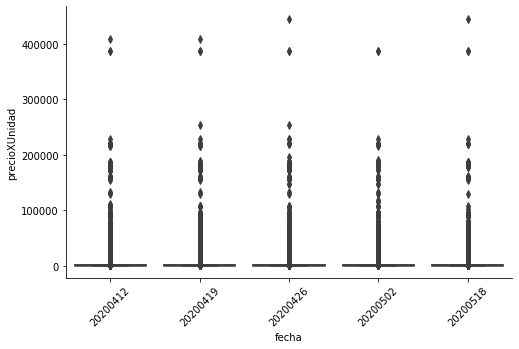

In [79]:
#Mostramos boxplot de precioXUnidad en cada fecha informada
plt.figure(figsize=(8,5))
p1=sns.boxplot(data=datasetNew,
                x='fecha', y='PrecioXUnidad')
plt.ylabel('precioXUnidad')
plt.xlabel('fecha')
plt.xticks(rotation=45)
sns.despine()

A fin de poder eliminar los valores atípicos procedemos a generar nuevas columnas para media, desvío, mediana, q1 y q3 por fecha y producto. Esto nos permitirá utilizar z score, z score modificado o IRQ como métodos para eliminar outliers.

In [80]:
#funcion para determinar el desvío estámdard poblacional
def pop_std(x):
      return x.std(ddof=0)

In [81]:
def rename(newname):
    def decorator(f):
        f.__name__ = newname
        return f
    return decorator

def q_at(y):
    @rename(f'q{y:0.2f}')
    def q(x):
        return x.quantile(y)
    return q

In [82]:
# Obtenemos un dataset de medias, desvios, mediana, q1 y q3 para fecha y producto (Agregue la mediana para poder di podía realizar el metodo Modified Z-score, pero es más efectivo el Z-score ). las columnas q1 y q3 sirven para calcular IRQ
df_product_mean_std=datasetNew[['fecha','producto_id','PrecioXUnidad']].groupby(['fecha','producto_id'],as_index=False).agg(['mean','median',pop_std,q_at(0.25) ,q_at(0.75)])
df_product_mean_std.columns = ['media','mediana','desvio','q1','q3']
df_product_mean_std = df_product_mean_std.reset_index()
df_product_mean_std.head()

,fecha,producto_id,media,mediana,desvio,q1,q3
0,20200412,0000000001663,29.90,29.90,0.00,29.90,29.90
1,20200412,0000000002288,34.90,34.90,5.00,32.40,37.40
2,20200412,0000000205870,524.99,529.99,16.58,514.99,539.99
3,20200412,0000000205894,589.99,589.99,0.00,589.99,589.99
4,20200412,0000000205955,189.99,189.99,0.00,189.99,189.99


In [83]:
#Mostramos la cantidad de filas y columnas del dataset antes del join con el dataset de estadisticos
datasetNew.shape

(2196790, 14)

In [84]:
#Unimos los dataset de estadisticas al dataset original para obtener un dataset resultante con columnas de medias, mediana, desviso, q1 y q3
datasetNew=pd.merge(datasetNew,df_product_mean_std)

In [85]:
#Mostramos que luego del join entre el dataset y el dataset de estadisticos no se han perdido filas
datasetNew.shape

(2196790, 19)

In [86]:
datasetNew.dtypes

precio           float64
producto_id       object
sucursal_id       object
fecha             object
marca             object
nombre            object
presentacion      object
categoria1        object
categoria2        object
categoria3        object
cantidad         float64
unidad            object
PrecioXUnidad    float64
nuevaUnidad       object
media            float64
mediana          float64
desvio           float64
q1               float64
q3               float64
dtype: object

In [87]:
#Generamos una nueva columna con el IRQ
datasetNew['IQR']=datasetNew.q3-datasetNew.q1

In [88]:
#Identificamos los outliers utilizando el metodo IQR
outliers_iqr=datasetNew[((datasetNew.PrecioXUnidad < (datasetNew.q1 - 1.5 * datasetNew.IQR)) |(datasetNew.PrecioXUnidad > (datasetNew.q3 + 1.5 * datasetNew.IQR)))]
outliers_iqr.shape

(124219, 20)

In [89]:
#Identificamos los outliers con el metodo z score
outliers=datasetNew[(np.abs(datasetNew.PrecioXUnidad - datasetNew.media) > (3 * datasetNew.desvio))] 
outliers.shape

(16003, 20)

In [90]:
#Mostramos los outliers detectados con el método z score que no estan en outlier detectados utilizando el metodo IQR
outliers[~outliers.producto_id.isin(outliers_iqr.producto_id)]

,precio,producto_id,sucursal_id,fecha,marca,nombre,presentacion,categoria1,categoria2,categoria3,cantidad,unidad,PrecioXUnidad,nuevaUnidad,media,mediana,desvio,q1,q3,IQR
115517,94.99,4005808817658,25-1-1,20200426,NIVEA,Espuma de Afeitar Nivea Cool Kick 200 Ml,200.0 ml,NaN,NaN,NaN,200.00,ml,474.95,lt,849.25,820.00,123.63,765.00,965.00,200.00
115572,94.99,4005808817658,25-1-1,20200518,NIVEA,Espuma de Afeitar Nivea Cool Kick 200 Ml,200.0 ml,NaN,NaN,NaN,200.00,ml,474.95,lt,830.77,810.00,113.00,750.00,945.00,195.00
277276,33.99,7613034497062,11-2-1011,20200419,MAGGI,Pure de Papas Cremoso Instantaneo Maggi 125 Gr,125.0 gr,NaN,NaN,NaN,125.00,gr,271.92,kg,535.47,536.00,86.23,464.00,600.00,136.00
277352,33.99,7613034497062,11-2-1111,20200426,MAGGI,Pure de Papas Cremoso Instantaneo Maggi 125 Gr,125.0 gr,NaN,NaN,NaN,125.00,gr,271.92,kg,534.45,540.00,87.02,464.00,600.00,136.00
284497,74.90,7613035161566,9-1-655,20200518,NESCAFÉ,Cafe Cortado Instantaneo NesCafe Dolca 125 Gr,125.0 gr,NaN,NaN,NaN,125.00,gr,599.20,kg,1002.08,1039.92,131.88,879.56,1095.16,215.60
367134,639.00,7790010616751,49-1-2,20200412,CAREFREE,Protectores Diarios Todos Los Dias Carefree 100 Un,100.0 un,NaN,NaN,NaN,100.00,un,6.39,un,4.52,4.69,0.61,3.85,4.90,1.04
367136,639.00,7790010616751,50-1-2,20200412,CAREFREE,Protectores Diarios Todos Los Dias Carefree 100 Un,100.0 un,NaN,NaN,NaN,100.00,un,6.39,un,4.52,4.69,0.61,3.85,4.90,1.04
367224,639.00,7790010616751,49-1-2,20200419,CAREFREE,Protectores Diarios Todos Los Dias Carefree 100 Un,100.0 un,NaN,NaN,NaN,100.00,un,6.39,un,4.54,4.70,0.61,3.88,4.94,1.06
367226,639.00,7790010616751,50-1-2,20200419,CAREFREE,Protectores Diarios Todos Los Dias Carefree 100 Un,100.0 un,NaN,NaN,NaN,100.00,un,6.39,un,4.54,4.70,0.61,3.88,4.94,1.06
367312,639.00,7790010616751,49-1-2,20200426,CAREFREE,Protectores Diarios Todos Los Dias Carefree 100 Un,100.0 un,NaN,NaN,NaN,100.00,un,6.39,un,4.52,4.69,0.62,3.83,4.89,1.06


**Nota:** existen 27 outliers detectados en el metodo z score que no se detectan en el metodo IQR

In [91]:
#Generamos una copia con los datos del dataset hasta aqui para uso mas adelante 
datasetNew_OUT = datasetNew.copy() 

**Nota:** Dado que existen outliers que el metodo z score detecto y el metodo IRQ no tiene hemos decidido utilizar ambos metodos para eliminar outliers

In [92]:
#Eliminamos outliers con el metodo z score
datasetNew=datasetNew[(np.abs(datasetNew.PrecioXUnidad - datasetNew.media) <= (3 * datasetNew.desvio))] 

#Eliminamos outliers con el metodo IRQ
datasetNew=datasetNew[~((datasetNew.PrecioXUnidad < (datasetNew.q1 - 1.5 * datasetNew.IQR)) | (datasetNew.PrecioXUnidad > (datasetNew.q3 + 1.5 * datasetNew.IQR)))]
datasetNew.shape

(2072493, 20)

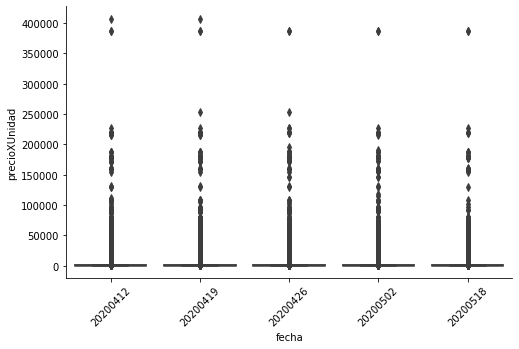

In [93]:
#Mostramos el boxplot con los datos de outliers ya eliminados
plt.figure(figsize=(8,5))
p1=sns.boxplot(data=datasetNew,
                x='fecha', y='PrecioXUnidad')
plt.ylabel('precioXUnidad')
plt.xlabel('fecha')
plt.xticks(rotation=45)
sns.despine()

**Nota:** bajo el metodo de eliminacion de outliers utilizando z-score se eliminan 16003 filas outliers de productos mientras que utilizando IQR se eliminan 124219 filas. Existian dentro de las 16003 filas de z score 27 filas que no estaban dentro de las 124219 filas del metodo IRQ.

#### 2.7. Evaluar Cómo Comprimir los Datos Para su Almacenamiento Más Eficiente

Una forma podria ser codificar todas las variables categoricas de manera que se reduzcan todas las variables a nros para luego comprimir los archivos. Tambien se utiliza el formato parquet con compresion snappy sobre hdfs como uno de los formatos posibles cuando se requiere almacenar grandes volumenes de información y mayor compresión.

#### 2.8. Guardar el Set de Datos con un Nombre Informativo

In [94]:
#Mostramos la cantidad de filas y columnas ante de unir el dataset con sucursales
datasetNew.shape

(2072493, 20)

In [95]:
#Agregamos sucursales al nuevo dataset
datasetNew=pd.merge(datasetNew,sucursales,left_on='sucursal_id',right_on='id',how='inner').drop(columns = 'id')

In [96]:
#Mostramos que luego del join entre el dataset y sucursales no se perdieron filas
datasetNew.shape

(2072493, 33)

In [97]:
datasetNew.dtypes

precio                 float64
producto_id             object
sucursal_id             object
fecha                   object
marca                   object
nombre                  object
presentacion            object
categoria1              object
categoria2              object
categoria3              object
cantidad               float64
unidad                  object
PrecioXUnidad          float64
nuevaUnidad             object
media                  float64
mediana                float64
desvio                 float64
q1                     float64
q3                     float64
IQR                    float64
comercioId               int64
banderaId                int64
banderaDescripcion      object
comercioRazonSocial     object
provincia               object
localidad               object
direccion               object
lat                    float64
lng                    float64
sucursalNombre          object
sucursalTipo            object
nom_provincia           object
region  

Debido a que en puntos posteriores se va a seguir trabajando con el conjunto de datos la siguiente linea la dejamos comentada pero ejemplifica como guardariamos el dataset en un archivo formato zip 

In [98]:
#pd.to_pickle(datasetNew, 'sucursal_producto_precio.pkl', compression="zip")

### 3. Pasos de Limpieza Deseables

#### 3.1. Ordenar Variables/Columnas

In [99]:
#Mostramos las columnas del dataset
datasetNew.columns

Index(['precio', 'producto_id', 'sucursal_id', 'fecha', 'marca', 'nombre',
       'presentacion', 'categoria1', 'categoria2', 'categoria3', 'cantidad',
       'unidad', 'PrecioXUnidad', 'nuevaUnidad', 'media', 'mediana', 'desvio',
       'q1', 'q3', 'IQR', 'comercioId', 'banderaId', 'banderaDescripcion',
       'comercioRazonSocial', 'provincia', 'localidad', 'direccion', 'lat',
       'lng', 'sucursalNombre', 'sucursalTipo', 'nom_provincia', 'region'],
      dtype='object')

In [100]:
#Ordenamos las columnas del dataset
datasetNew = datasetNew[['fecha','sucursal_id', 'comercioId','banderaId','banderaDescripcion','comercioRazonSocial','sucursalNombre','sucursalTipo','producto_id','lat','lng','nombre', 'presentacion','categoria1','categoria2','categoria3','marca','region','provincia','nom_provincia','localidad','cantidad','unidad','nuevaUnidad','precio','PrecioXUnidad','media','desvio','q1','q3','IQR']]
datasetNew.head()

,fecha,sucursal_id,comercioId,banderaId,banderaDescripcion,comercioRazonSocial,sucursalNombre,sucursalTipo,producto_id,lat,lng,nombre,presentacion,categoria1,categoria2,categoria3,marca,region,provincia,nom_provincia,localidad,cantidad,unidad,nuevaUnidad,precio,PrecioXUnidad,media,desvio,q1,q3,IQR
0,20200412,2-1-014,2,1,La Anonima,S.A. Importadora y Exportadora de la Patagonia,PUERTO MADRYN,Supermercado,0000000001663,-42.76,-65.04,Radicheta Atada La Anonima 1 Un,1.0 un,NaN,NaN,NaN,LA ANÓNIMA,Patagonia,AR-U,Chubut,Puerto Madryn,1.00,un,un,29.90,29.90,29.90,0.00,29.90,29.90,0.00
1,20200412,2-1-014,2,1,La Anonima,S.A. Importadora y Exportadora de la Patagonia,PUERTO MADRYN,Supermercado,0000075024956,-42.76,-65.04,Desodorante Antitranspirante en Barra Men V8 Rexona 50 Gr,50.0 gr,NaN,NaN,NaN,REXONA,Patagonia,AR-U,Chubut,Puerto Madryn,50.00,gr,kg,181.00,3620.00,3442.13,251.89,3270.00,3600.00,330.00
2,20200412,2-1-014,2,1,La Anonima,S.A. Importadora y Exportadora de la Patagonia,PUERTO MADRYN,Supermercado,0000075026455,-42.76,-65.04,Desodorante Stick Nutritivo Rexona 50 Gr,50.0 gr,NaN,NaN,NaN,REXONA,Patagonia,AR-U,Chubut,Puerto Madryn,50.00,gr,kg,181.00,3620.00,3444.39,233.68,3329.50,3600.00,270.50
3,20200412,2-1-014,2,1,La Anonima,S.A. Importadora y Exportadora de la Patagonia,PUERTO MADRYN,Supermercado,0000075027513,-42.76,-65.04,Desodorante Original Dove 50 Gr,50.0 gr,NaN,NaN,NaN,DOVE,Patagonia,AR-U,Chubut,Puerto Madryn,50.00,gr,kg,216.00,4320.00,3989.49,328.12,3782.00,4180.00,398.00
4,20200412,2-1-014,2,1,La Anonima,S.A. Importadora y Exportadora de la Patagonia,PUERTO MADRYN,Supermercado,0000077900050,-42.76,-65.04,Manteca Ilolay 100 Gr,100.0 gr,NaN,NaN,NaN,ILOLAY,Patagonia,AR-U,Chubut,Puerto Madryn,100.00,gr,kg,87.00,870.00,771.96,149.20,689.25,865.00,175.75


#### 3.2. Quitar Variables/Columnas Irrelevantes

Tenemos alguna en este caso?

A efectos de responder la pregunta de precios por región y ciudad hemos detajdo a continuación solo las variables que consideramos de interes en el conjunto de datos

In [101]:
#Dejamos las columnas de interes en el dataset
datasetNew = datasetNew[['fecha','sucursal_id', 'sucursalNombre','sucursalTipo','producto_id', 'nombre', 'marca','region','nom_provincia','localidad','cantidad','unidad','nuevaUnidad','precio','PrecioXUnidad','media','desvio']]
datasetNew

,fecha,sucursal_id,sucursalNombre,sucursalTipo,producto_id,nombre,marca,region,nom_provincia,localidad,cantidad,unidad,nuevaUnidad,precio,PrecioXUnidad,media,desvio
0,20200412,2-1-014,PUERTO MADRYN,Supermercado,0000000001663,Radicheta Atada La Anonima 1 Un,LA ANÓNIMA,Patagonia,Chubut,Puerto Madryn,1.00,un,un,29.90,29.90,29.90,0.00
1,20200412,2-1-014,PUERTO MADRYN,Supermercado,0000075024956,Desodorante Antitranspirante en Barra Men V8 Rexona 50 Gr,REXONA,Patagonia,Chubut,Puerto Madryn,50.00,gr,kg,181.00,3620.00,3442.13,251.89
2,20200412,2-1-014,PUERTO MADRYN,Supermercado,0000075026455,Desodorante Stick Nutritivo Rexona 50 Gr,REXONA,Patagonia,Chubut,Puerto Madryn,50.00,gr,kg,181.00,3620.00,3444.39,233.68
3,20200412,2-1-014,PUERTO MADRYN,Supermercado,0000075027513,Desodorante Original Dove 50 Gr,DOVE,Patagonia,Chubut,Puerto Madryn,50.00,gr,kg,216.00,4320.00,3989.49,328.12
4,20200412,2-1-014,PUERTO MADRYN,Supermercado,0000077900050,Manteca Ilolay 100 Gr,ILOLAY,Patagonia,Chubut,Puerto Madryn,100.00,gr,kg,87.00,870.00,771.96,149.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072488,20200412,15-1-151,151 - Villa Bosch,Autoservicio,7791058790359,Yogur Parcialmente Descremado Vainilla Yofre 140 Gr,YOFRE,Centro,Provincia de Buenos Aires,Villa Bosch,140.00,gr,kg,24.39,174.21,154.01,30.07
2072489,20200412,15-1-151,151 - Villa Bosch,Autoservicio,7791058790366,Yogur Parcialmente Descremado Dulce de Leche Yofre 140 Gr,YOFRE,Centro,Provincia de Buenos Aires,Villa Bosch,140.00,gr,kg,24.39,174.21,152.79,29.71
2072490,20200412,15-1-1012,1012 - Monte Grande,Supermercado,7792798002399,Cerveza 24.7 Patagonia 730 Ml,PATAGONIA,Centro,Provincia de Buenos Aires,Monte Grande,730.00,ml,lt,164.89,225.88,215.11,34.58
2072491,20200412,15-1-1012,1012 - Monte Grande,Supermercado,7798120540959,Grisines Malteados 200 Gr,SIN MARCA,Centro,Provincia de Buenos Aires,Monte Grande,200.00,gr,kg,91.95,459.75,290.35,169.40


#### 3.3. Renombrar Variables de Grillas

Esto se puede hacer de manera transparente a través de un diccionario.


In [102]:
#Renombramos a cammel case una de las variables de interes
datasetNew.rename(columns={'PrecioXUnidad':'precioXUnidad'}, 
                 inplace=True)
datasetNew.head()

,fecha,sucursal_id,sucursalNombre,sucursalTipo,producto_id,nombre,marca,region,nom_provincia,localidad,cantidad,unidad,nuevaUnidad,precio,precioXUnidad,media,desvio
0,20200412,2-1-014,PUERTO MADRYN,Supermercado,0000000001663,Radicheta Atada La Anonima 1 Un,LA ANÓNIMA,Patagonia,Chubut,Puerto Madryn,1.00,un,un,29.90,29.90,29.90,0.00
1,20200412,2-1-014,PUERTO MADRYN,Supermercado,0000075024956,Desodorante Antitranspirante en Barra Men V8 Rexona 50 Gr,REXONA,Patagonia,Chubut,Puerto Madryn,50.00,gr,kg,181.00,3620.00,3442.13,251.89
2,20200412,2-1-014,PUERTO MADRYN,Supermercado,0000075026455,Desodorante Stick Nutritivo Rexona 50 Gr,REXONA,Patagonia,Chubut,Puerto Madryn,50.00,gr,kg,181.00,3620.00,3444.39,233.68
3,20200412,2-1-014,PUERTO MADRYN,Supermercado,0000075027513,Desodorante Original Dove 50 Gr,DOVE,Patagonia,Chubut,Puerto Madryn,50.00,gr,kg,216.00,4320.00,3989.49,328.12
4,20200412,2-1-014,PUERTO MADRYN,Supermercado,0000077900050,Manteca Ilolay 100 Gr,ILOLAY,Patagonia,Chubut,Puerto Madryn,100.00,gr,kg,87.00,870.00,771.96,149.20


#### 3.4. Categorizar Variables que Contengan “Otros”

In [103]:
#Verificamos si existen variables con valores Otros
datasetNew.filter(regex='Otros', axis=0)

,fecha,sucursal_id,sucursalNombre,sucursalTipo,producto_id,nombre,marca,region,nom_provincia,localidad,cantidad,unidad,nuevaUnidad,precio,precioXUnidad,media,desvio


**Nota:** como se observa no hay hasta el momento columnas que estan categorizadas con la palabra "Otros". Mas adelante se procedera a trabajar con categorias "Otros" para diferentes variables tales como nombre y marca.

#### 3.5. Agregar Metadata a los Datos

Cuando y como fueron obtenidos, limpieza realizada, decisiones implementadas, asunciones, etc.

In [104]:
#Generamos metadata indicando que significa cada variable y una variable observacion con detalles del tratamiento de los datos
meta = {"fecha": "fecha de precios de producto informado en la pagina de precios claros"
        ,"sucursal_id": "ID de la sucursal. Los dos primeros numeros determinan la cadena."
        ,"sucursalNombre": "Nombre de sucursal"
        ,"sucursalTipo" : "Tipo de sucursal Supermercado, Hipermercado o Auteservicio"
        ,"producto_id" : "Código EAN del producto"
        ,"nombre" : "Nombre comercial de Producto"
        ,"marca" : "Marca del producto"
        ,"region" : "Región de la sucursal en donde se informe el precio del producto. Las regiones pueden ser Patagonia, Centro, Norte Grande o Cuyo"
        ,"nom_provincia" : "Nombre de la provincia donde se encuentra la sucursal que informa el precio del producto"
        ,"localidad" : "Nombre de la localidad donde se encuentra la sucursal que informa el precio del producto"
        ,"cantidad" : "Cantidad de producto informado"
        ,"unidad" : "Unidad de medida de producto informado"
        ,"um_homogenea": "Unidad de medida llevado a lt, kg o unidades segun corresponda"
        ,"precio" : "Precio del producto en pesos argentinos"
        ,"precioXUnidad" : "Precio del producto en pesos argentinos por lt, kg o unidades homogeneizado"
        ,"media" : "Media estadistica por fecha y producto_-id"
        ,"desvio" : "Desvio poblacional por fecha y producto_id"
        ,"Observacioens" : "Se eliminaron los NaN en precios, productos que no tenian marcas ni preesentaciones, outliers utilizando z score e IRQ"
        ,"Created": "13/07/2020"}
dfMeta = pd.DataFrame.from_dict(meta, orient='index').rename(
    columns = {0:'Descripción'})
dfMeta

,Descripción
fecha,fecha de precios de producto informado en la pagina de precios claros
sucursal_id,ID de la sucursal. Los dos primeros numeros determinan la cadena.
sucursalNombre,Nombre de sucursal
sucursalTipo,"Tipo de sucursal Supermercado, Hipermercado o Auteservicio"
producto_id,Código EAN del producto
nombre,Nombre comercial de Producto
marca,Marca del producto
region,"Región de la sucursal en donde se informe el precio del producto. Las regiones pueden ser Patagonia, Centro, Norte Grande o Cuyo"
nom_provincia,Nombre de la provincia donde se encuentra la sucursal que informa el precio del producto
localidad,Nombre de la localidad donde se encuentra la sucursal que informa el precio del producto


## II. Análisis en Profundidad del Contenido

### 1. Features Tipo Objetos

Primero nos quedamos con las features cuyo tipo es 'Objeto'.

In [105]:
# Observamos los campos que tienen tipo 'Objeto'
precios.dtypes[precios.dtypes == 'object']

producto_id    object
sucursal_id    object
fecha          object
dtype: object

In [106]:
#Formateamos la variable fecha
precios['fecha'] = pd.to_datetime(precios['fecha'], format="%Y%m%d")

In [107]:
precios.dtypes

precio                float64
producto_id            object
sucursal_id            object
fecha          datetime64[ns]
dtype: object

### 2. producto_id en Entidad Producto

In [108]:
productos.dtypes[productos.dtypes=='object']

id              object
marca           object
nombre          object
presentacion    object
categoria1      object
categoria2      object
categoria3      object
unidad          object
dtype: object

In [109]:
#Renombramos la columna id de productos
productos.rename(columns={'id':'producto_id'}, 
                 inplace=True)
productos.dtypes

producto_id      object
marca            object
nombre           object
presentacion     object
categoria1       object
categoria2       object
categoria3       object
cantidad        float64
unidad           object
dtype: object

Aprovechando que estamos profundizando en el análisis de los datos de productos procederemos a sacar del nombre del producto la marca para tener mejor calidad de datos

In [110]:
#función definida para reemplazar la marca del nombre, sabiendo que no tienen que haber nulos
def replace_substring(x):
    return (
         x["nombre"].replace(x["marca"], "")
    )
#se saca la marca del nombre
productos["nombre"] = productos.apply(lambda x: replace_substring(x), axis=1)

### 3. sucursal_id en Entidad Sucursales

In [111]:
sucursales.dtypes

id                      object
comercioId               int64
banderaId                int64
banderaDescripcion      object
comercioRazonSocial     object
provincia               object
localidad               object
direccion               object
lat                    float64
lng                    float64
sucursalNombre          object
sucursalTipo            object
nom_provincia           object
region                  object
dtype: object

In [112]:
#Renombramos la columna id de sucursales
sucursales.rename(columns={'id':'sucursal_id'}, 
                 inplace=True)
sucursales.dtypes

sucursal_id             object
comercioId               int64
banderaId                int64
banderaDescripcion      object
comercioRazonSocial     object
provincia               object
localidad               object
direccion               object
lat                    float64
lng                    float64
sucursalNombre          object
sucursalTipo            object
nom_provincia           object
region                  object
dtype: object

### 4. Precios Reportados por Sucursal

In [113]:
#Mostramos los preciosXUnidad reportados por fecha y sucursal
datasetNew.groupby(['fecha','sucursalNombre']).precioXUnidad.count().reset_index()

,fecha,sucursalNombre,precioXUnidad
0,20200412,BANFIELD,24
1,20200412,PTE. PERON,23
2,20200412,1012 - Monte Grande,2
3,20200412,1050 - Parana-Entre Rios,169
4,20200412,1057 - Rio Tercero,13
...,...,...,...
948,20200518,Vicente López - Maipú,8774
949,20200518,Vicente López.,4690
950,20200518,Yerba Buena.,447
951,20200518,ZAPALA,953


In [114]:
df_new = datasetNew.groupby(['fecha','sucursalNombre']).precioXUnidad.nunique().reset_index()

In [115]:
list_sucursales = list(datasetNew.sucursalNombre.unique())
cant_sucursales = len(list_sucursales)

In [116]:
list_fechas = list(datasetNew.fecha.unique())
cant_fechas = len(list_fechas)


In [117]:
print('Cantidad de sucursales:',cant_sucursales)
print('Cantidad de fechas:',cant_fechas)
print('Cantidad de sucursales informando precios por fechas:')
df_new.groupby('fecha').sucursalNombre.nunique().reset_index()

Cantidad de sucursales: 458
Cantidad de fechas: 5
Cantidad de sucursales informando precios por fechas:


,fecha,sucursalNombre
0,20200412,252
1,20200419,205
2,20200426,205
3,20200502,161
4,20200518,130


In [118]:
#Tabla crosstab de sucursales informando precios por fecha
datasetNew_CT = pd.crosstab(datasetNew.sucursalNombre, datasetNew.fecha, margins = True)
datasetNew_CT

fecha,20200412,20200419,20200426,20200502,20200518,All
sucursalNombre,,,,,,
BANFIELD,24,0,0,0,0,24
PTE. PERON,23,0,0,0,0,23
TEODORO GARCIA,0,30,0,0,0,30
1012 - Monte Grande,2,0,0,0,0,2
1035 - Moron,0,2853,0,0,0,2853
...,...,...,...,...,...,...
Zapala,0,0,0,4375,3508,7883
Zarate,0,18,19,0,0,37
Zarate Brazo Largo,0,0,0,20,0,20


#### Nota: Como se puede observar, no todas las sucursales presentan precios en todos los días.


### 5. Transformación y Ampliación de Características de Productos

#### 5.1 Presentación

In [119]:
#Verificamos que no existen nulos en presentacion de productos
productos.presentacion.isnull().sum()

0

In [120]:
#Convertimos a minusculas las letras que estan en presentacion y generamos una nueva columna presentacion_depurada
productos['presentacion_depurada'] = productos['presentacion'].str.lower()
productos['presentacion_depurada']

0          1.0 un
1          1.0 un
2          1.0 kg
3          1.0 kg
4          1.0 kg
           ...   
72033    500.0 gr
72034     12.0 un
72035     50.0 gr
72036     50.0 gr
72037    150.0 gr
Name: presentacion_depurada, Length: 72036, dtype: object

In [121]:
#Generamos la columna um_depurada con las unidades de medidas presentes en presentacion_depurada
productos['um_depurada'] = productos['presentacion_depurada'].str[-2:]
productos['um_depurada'].unique()

array(['un', 'kg', 'gr', 'ml', 'cc', 'lt', 'mt'], dtype=object)

In [122]:
#Generamos una nueva columna cantidad_depurada con las cantidades presentes en la presentacion_depurada
productos['cantidad_depurada'] = productos['presentacion_depurada'].str[0:-3]
productos['cantidad_depurada']

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
         ...  
72033    500.0
72034     12.0
72035     50.0
72036     50.0
72037    150.0
Name: cantidad_depurada, Length: 72036, dtype: object

Verificamos si existen diferencias entre la presentación indicada y la presentacion contenida en el nombre del producto. A continuación vamos a extraer del nombre del producto la presentación

In [123]:
#Creamos una nueva columna de nombre llamada nombre_depurado para trabajar sobre su depuracion
productos['nombre_depurado'] = productos['nombre']

In [124]:
#Definimos una función para pasar una o varias columnas minuscula
def column_lower(df, columns=[]):
    columns = list(columns)
    if len(columns) !=0:
        for i in range(len(columns)):
            if columns[i] in df.columns:
                df[columns[i]]=df[columns[i]].str.lower()
    else:
        print("Seleccione una columna o la columna no se encuentra en el DataFrame")


In [125]:
#Definimos una función para pasar sacar los acentos.
from unidecode import unidecode

def remove_accents(df, columns=[]):
    columns = list(columns)
    if len(columns) !=0:
        for i in range(len(columns)):
            if columns[i] in df.columns:
                df[columns[i]]=df[columns[i]].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')                
    else:
        print("Seleccione una columna o la columna no se encuentra en el DataFrame")


In [126]:
#Pasamos marca y nombre_depurado a minusculas y le removemos los acentos
column_lower(productos,['marca','nombre_depurado'])
remove_accents(productos,['marca','nombre_depurado'])

A continuación realizamos un analsis de aquellos casos en donde la unidad de medida en el nombre no coincide con la especificada en presentación.

In [127]:
#Verificamos la presencia de alguna de las unidades de medidas en el nombre del producto
search_um='\\b'+'\\b|\\b'.join(map(str, productos['um_depurada'].unique())) + '\\b'
productos['presentacion_en_nombre']=productos['nombre_depurado'].str.contains(search_um, na=False)

In [128]:
#Obtenemos aquellos productos cuya unidad de medida en el nombre no coincide con la unidad de medida de la presentación y la unidad de medida del nombre es una unidad de presentación válida
aux_df=productos[(productos.presentacion_en_nombre==True) & (productos.nombre_depurado.str[-2:] != productos.um_depurada) & (productos.nombre_depurado.str[-2:].str.contains(search_um, na=False))]
aux_df

,producto_id,marca,nombre,presentacion,categoria1,categoria2,categoria3,cantidad,unidad,presentacion_depurada,um_depurada,cantidad_depurada,nombre_depurado,presentacion_en_nombre
59,0000030108417,maybelline,Mascara para Pestañas Maybelline Volum Express 10 Gr,1.0 un,NaN,NaN,NaN,1.00,un,1.0 un,un,1.0,mascara para pestanas maybelline volum express 10 gr,True
146,0000077901729,jorgelin,Alfajor Negro Maxialfajor Jorgelin 2 Un,90.0 gr,NaN,NaN,NaN,90.00,gr,90.0 gr,gr,90.0,alfajor negro maxialfajor jorgelin 2 un,True
181,0000077908704,la lacteo,Flan Dulce de Leche en Pote La Lacteo 130 Gr,1.0 un,NaN,NaN,NaN,1.00,un,1.0 un,un,1.0,flan dulce de leche en pote la lacteo 130 gr,True
224,0000077921000,nogaly,Jabon Liquido Lirium Nogaly 275 Cc,275.0 ml,NaN,NaN,NaN,275.00,ml,275.0 ml,ml,275.0,jabon liquido lirium nogaly 275 cc,True
371,0000077949721,kinder,Chocolate Relleno Kinder 100 Gr,8.0 un,NaN,NaN,NaN,8.00,un,8.0 un,un,8.0,chocolate relleno kinder 100 gr,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71804,9-3-0000000927642,sin marca,Hinojo 1 Kg,1.0 un,NaN,NaN,NaN,1.00,un,1.0 un,un,1.0,hinojo 1 kg,True
71811,9-3-0000000941655,sin marca,Carne Picada Especial 1 Kg,1.0 un,NaN,NaN,NaN,1.00,un,1.0 un,un,1.0,carne picada especial 1 kg,True
71954,9-3-0000000957472,sin marca,Coliflor 1 Un,1.0 kg,NaN,NaN,NaN,1.00,kg,1.0 kg,kg,1.0,coliflor 1 un,True
71955,9-3-0000000957755,sin marca,Falda de Novillo 1 Kg,1.0 un,NaN,NaN,NaN,1.00,un,1.0 un,un,1.0,falda de novillo 1 kg,True


In [129]:
#Generamos un dataset df_last_words especificamente con las unidades de medidas que tiene el nombre
df_last_words=aux_df.nombre_depurado.str.extract('(\w+) (\w+)$',expand=False)
df_last_words.columns=['cantidad_depurada','um_depurada']
df_last_words

,cantidad_depurada,um_depurada
59,10,gr
146,2,un
181,130,gr
224,275,cc
371,100,gr
...,...,...
71804,1,kg
71811,1,kg
71954,1,un
71955,1,kg


In [130]:
df_last_words[df_last_words.index==71804]

,cantidad_depurada,um_depurada
71804,1,kg


**Nota:** se encontraron 1207 filas cuya presentación en el nombre no coinciden con la presentacion del producto

In [131]:
#Mostramos un caso de ejemplo en donde en el nombre figura 1 kg y en la presentacion 1.0 un
productos[productos.index==71811]

,producto_id,marca,nombre,presentacion,categoria1,categoria2,categoria3,cantidad,unidad,presentacion_depurada,um_depurada,cantidad_depurada,nombre_depurado,presentacion_en_nombre
71811,9-3-0000000941655,sin marca,Carne Picada Especial 1 Kg,1.0 un,NaN,NaN,NaN,1.00,un,1.0 un,un,1.0,carne picada especial 1 kg,True


Procederemos a actualizar la um_depurada y la cantidad_depurada en función de las siguientes reglas que definimos:

1- Cuando hay 1kg en nombre y 1 unidad en presentacion entonces dejamos 1 kg en la presentacion

2- Cuando hay gr en mombre y unidad en presentacion entonces dejamos la cantidad de gramos por cantidad de unidades en presentacion

3- Cuando hay mililitro en nombre y litro en presentacion entonces dejamos ml en presentacion. 

Cabe destacar que existe un vino cuyo producto_id=7791540049415 que tiene 750 lt en la presentacion en vez de 750 ml


In [132]:
#Definimos una funcion para sobreescribir la um_depurada y cantidad_depurada en funcion de las reglas que definimos
def update_var_depurada(row,data):
    for i in data.index:
        if (row[row.index==i].presentacion_en_nombre==True).any():
            if (((data[data.index==i].um_depurada=='kg') & (row[row.index==i].um_depurada=='un') & (row[row.index==i].cantidad_depurada=='1')).any() |
                ((data[data.index==i].um_depurada=='ml') & (row[row.index==i].um_depurada=='lt')).any()):
                row.loc[i,'um_depurada']=data.loc[i,'um_depurada']
                row.loc[i,'cantidad_depurada']=data.loc[i,'cantidad_depurada']
                if (i==59):
                    print('llego',data[data.index==i].um_depurada,data[data.index==i].cantidad_depurada)
            elif ((data[data.index==i].um_depurada=='gr') & (row[row.index==i].um_depurada=='un')).any():
                row.loc[i,'um_depurada']=data.loc[i,'um_depurada']
                row.loc[i,'cantidad_depurada']=pd.to_numeric(data.loc[i,'cantidad_depurada']) * pd.to_numeric(row.loc[i,'cantidad_depurada'])
    return row

In [133]:
#Actualizo las um_depurada y cantidad_depurada de acuerdo a la reglas antes especificadas
update_var_depurada(productos,df_last_words)

,producto_id,marca,nombre,presentacion,categoria1,categoria2,categoria3,cantidad,unidad,presentacion_depurada,um_depurada,cantidad_depurada,nombre_depurado,presentacion_en_nombre
0,0000000001663,la anonima,Radicheta Atada La Anonima 1 Un,1.0 un,NaN,NaN,NaN,1.00,un,1.0 un,un,1.0,radicheta atada la anonima 1 un,True
1,0000000002288,la anonima,Perejil Atado La Anonima 1 Un,1.0 un,NaN,NaN,NaN,1.00,un,1.0 un,un,1.0,perejil atado la anonima 1 un,True
2,0000000205870,sin marca,Ojo de Bife 1 Kg,1.0 kg,NaN,NaN,NaN,1.00,kg,1.0 kg,kg,1.0,ojo de bife 1 kg,True
3,0000000205894,sin marca,Milanesa de Peceto Novillito 1 Kg,1.0 kg,NaN,NaN,NaN,1.00,kg,1.0 kg,kg,1.0,milanesa de peceto novillito 1 kg,True
4,0000000205955,sin marca,Chiquizuela Novillito 1 Kg,1.0 kg,NaN,NaN,NaN,1.00,kg,1.0 kg,kg,1.0,chiquizuela novillito 1 kg,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72033,9569753142128,deli-sitas,Milhojas Cobertura de Chocolate Blanco Deli-Sitas 500 Gr,500.0 gr,NaN,NaN,NaN,500.00,gr,500.0 gr,gr,500.0,milhojas cobertura de chocolate blanco deli-sitas 500 gr,True
72034,9795403001143,mayo,Mini Pizzetas Mayo 12 Un,12.0 un,NaN,NaN,NaN,12.00,un,12.0 un,un,12.0,mini pizzetas mayo 12 un,True
72035,9990385651922,dana,Te Negro en Hebras Lata Dana 50 Gr,50.0 gr,NaN,NaN,NaN,50.00,gr,50.0 gr,gr,50.0,te negro en hebras lata dana 50 gr,True
72036,9990385651939,dana,Te Verde en Hebras Lata Dana 50 Gr,50.0 gr,NaN,NaN,NaN,50.00,gr,50.0 gr,gr,50.0,te verde en hebras lata dana 50 gr,True


In [134]:
#Mostramos el ejemplo de un vino que tiene la presentacion en 750 litros en vez de mililitros y que vamos a corregir mas adelante
productos[productos.producto_id=='7791540049415']

,producto_id,marca,nombre,presentacion,categoria1,categoria2,categoria3,cantidad,unidad,presentacion_depurada,um_depurada,cantidad_depurada,nombre_depurado,presentacion_en_nombre
36429,7791540049415,termidor,Vino Abocado Termidor 750 Ml,750.0 lt,NaN,NaN,NaN,750.00,lt,750.0 lt,ml,750,vino abocado termidor 750 ml,True


In [135]:
#Mostramos otro ejemplo de un producto en donde reemplazamos la um_depurada y cantidad_depurada por la informacion proveniente del nombre
productos[productos.producto_id=='0000030108417']

,producto_id,marca,nombre,presentacion,categoria1,categoria2,categoria3,cantidad,unidad,presentacion_depurada,um_depurada,cantidad_depurada,nombre_depurado,presentacion_en_nombre
59,0000030108417,maybelline,Mascara para Pestañas Maybelline Volum Express 10 Gr,1.0 un,NaN,NaN,NaN,1.00,un,1.0 un,gr,10.00,mascara para pestanas maybelline volum express 10 gr,True


In [136]:
# Vemos que valores únicos tiene la columna um_depurada incluyendo ahora el nuevo valor pack
productos['um_depurada'].unique()

array(['un', 'kg', 'gr', 'ml', 'cc', 'lt', 'mt'], dtype=object)

A continuación mostramos otro ejemplo de caso problemático dado que en el nombre indica 4 un y en la presentacion 14.0 un. Revisando la presentacion de este producto en internet verificamos que se comercializa efectivamente por 14 unidades. Esto no asegura que en todos los casos en donde la unidad de medida es la misma y la cantidad es distinta en el nombre respecto a lo expresado en la presentacion puedan tener el mismo tratamiento. Entendemos que puede ser necesario evaluar caso a caso.

In [137]:
productos[productos.producto_id=='0036000456097']

,producto_id,marca,nombre,presentacion,categoria1,categoria2,categoria3,cantidad,unidad,presentacion_depurada,um_depurada,cantidad_depurada,nombre_depurado,presentacion_en_nombre
927,0036000456097,good nites,Pañal M Unisex Goodnites 4 Un,14.0 un,NaN,NaN,NaN,14.00,un,14.0 un,un,14.0,panal m unisex goodnites 4 un,True


**Nota:** Tambien observamos que en el nombre se suelen poner unidades de medida o cantidades pero en forma no normalizadas como por ejemplo la letra G para indicar gr o el numero solo para indicar cantidad. 

In [138]:
#Mostramos solo a modo de otro tipo de problematica que existen algunos casos donde a priori la presentacion no se encuentra 
#en el nombre o la presentacion en el nombre no esta completa
productos[productos.presentacion_en_nombre==False]

,producto_id,marca,nombre,presentacion,categoria1,categoria2,categoria3,cantidad,unidad,presentacion_depurada,um_depurada,cantidad_depurada,nombre_depurado,presentacion_en_nombre
249,0000077928672,mentho plus,Caramelos Sabor Berries Creamix Menthoplus 27.2,27.2 gr,NaN,NaN,NaN,27.20,gr,27.2 gr,gr,27.2,caramelos sabor berries creamix menthoplus 27.2,False
354,0000077947932,sedal,Shampoo Sedal Rest Inst X24Un X10Ml,10.0 ml,NaN,NaN,NaN,10.00,ml,10.0 ml,ml,10.0,shampoo sedal rest inst x24un x10ml,False
355,0000077947963,sedal,Acondicionador Sedal Rest Inst X24Un X10Ml,10.0 ml,NaN,NaN,NaN,10.00,ml,10.0 ml,ml,10.0,acondicionador sedal rest inst x24un x10ml,False
1185,0070942127141,gum,Set Cepillo Y Limpiador Lingual Supreme,2.0 un,NaN,NaN,NaN,2.00,un,2.0 un,un,2.0,set cepillo y limpiador lingual supreme,False
1213,0071603010048,trim,Trim Repujador de Cuticula Acero Inoxidable,1.0 un,NaN,NaN,NaN,1.00,un,1.0 un,un,1.0,trim repujador de cuticula acero inoxidable,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68630,8004323240473,colavita,Fideos Colavita Rigatoni Rom X5,500.0 gr,NaN,NaN,NaN,500.00,gr,500.0 gr,gr,500.0,fideos colavita rigatoni rom x5,False
68846,8410740904001,la casa,Turron de Almendras Duro en Caja La Casa 150 Grm,150.0 gr,NaN,NaN,NaN,150.00,gr,150.0 gr,gr,150.0,turron de almendras duro en caja la casa 150 grm,False
69296,8480017124883,dia,Rollo Cocina Dia 70 Paños,1.0 un,NaN,NaN,NaN,1.00,un,1.0 un,un,1.0,rollo cocina dia 70 panos,False
69754,8480017343734,leguf,Arvejas Secas Remojadas Leguf 350,350.0 gr,NaN,NaN,NaN,350.00,gr,350.0 gr,gr,350.0,arvejas secas remojadas leguf 350,False


In [139]:
#Asginamos la unidad de medida pack a las promociones y a los que en el nombre tiene las palabras pack, Paga o Lleva
productos.loc[productos['nombre'].str.contains('\\b3x2\\b|\\b2x1\\b|\\b4x3\\b|\\bPaga\\b|\\bLleva\\b|\\bpack\\b', na=False),'um_depurada']='pack'

In [140]:
productos[productos.um_depurada=='pack']

,producto_id,marca,nombre,presentacion,categoria1,categoria2,categoria3,cantidad,unidad,presentacion_depurada,um_depurada,cantidad_depurada,nombre_depurado,presentacion_en_nombre
1119,0070330732339,bic,Maquina de Afeitar Bic Lady Shaver Lleva 5 Paga 4 Flowpack 5 Un,5.0 un,NaN,NaN,NaN,5.00,un,5.0 un,pack,5.0,maquina de afeitar bic lady shaver lleva 5 paga 4 flowpack 5 un,True
18466,7790040931909,sonrisas,Galletitas con Relleno de Vainilla Bagley Sonrisas pack 3 Un 360 Gr,360.0 gr,NaN,NaN,NaN,360.00,gr,360.0 gr,pack,360.0,galletitas con relleno de vainilla bagley sonrisas pack 3 un 360 gr,True
43344,7793100194450,colgate,Crema Dental Sensitive Colgate 2x1 100 Gr,2.0 un,NaN,NaN,NaN,2.00,un,2.0 un,pack,200.00,crema dental sensitive colgate 2x1 100 gr,True


In [141]:
# Vemos que valores únicos tiene la columna um_depurada incluyendo ahora el nuevo valor pack
productos['um_depurada'].unique()

array(['un', 'kg', 'gr', 'ml', 'cc', 'lt', 'pack', 'mt'], dtype=object)

In [142]:
# Realizamos la conversión de las UM a UM homogeneas.
# estandar= ('kg', 'un','lt', 'mt' ,'pack')

def homogenea (cantidad,unidad):
    if unidad in ('un', 'mt', 'kg', 'lt'):
        return round (1/cantidad, 3), unidad
    elif unidad in ('pack'):
        return 1, unidad
    elif unidad in ('gr'):
        return round (1000/cantidad, 3), 'kg' 
    elif unidad in ('cc', 'ml'):
        return round (1000/cantidad, 3), 'lt'

In [143]:
# Creamos dos nuevas columnas denominadas um_homogenea y factor_homogenea
productos[['factor_homogenea','um_homogenea']] = productos.swifter.apply(lambda x: homogenea(float(x['cantidad_depurada']),x['um_depurada']),axis=1, result_type='expand')

In [144]:
# Creamos variables Dummies que identifiquen el tipo de Unidad de Medida
productos=pd.get_dummies(productos, columns=['um_homogenea'])
productos.head()

,producto_id,marca,nombre,presentacion,categoria1,categoria2,categoria3,cantidad,unidad,presentacion_depurada,um_depurada,cantidad_depurada,nombre_depurado,presentacion_en_nombre,factor_homogenea,um_homogenea_kg,um_homogenea_lt,um_homogenea_mt,um_homogenea_pack,um_homogenea_un
0,0000000001663,la anonima,Radicheta Atada La Anonima 1 Un,1.0 un,NaN,NaN,NaN,1.00,un,1.0 un,un,1.0,radicheta atada la anonima 1 un,True,1.00,0,0,0,0,1
1,0000000002288,la anonima,Perejil Atado La Anonima 1 Un,1.0 un,NaN,NaN,NaN,1.00,un,1.0 un,un,1.0,perejil atado la anonima 1 un,True,1.00,0,0,0,0,1
2,0000000205870,sin marca,Ojo de Bife 1 Kg,1.0 kg,NaN,NaN,NaN,1.00,kg,1.0 kg,kg,1.0,ojo de bife 1 kg,True,1.00,1,0,0,0,0
3,0000000205894,sin marca,Milanesa de Peceto Novillito 1 Kg,1.0 kg,NaN,NaN,NaN,1.00,kg,1.0 kg,kg,1.0,milanesa de peceto novillito 1 kg,True,1.00,1,0,0,0,0
4,0000000205955,sin marca,Chiquizuela Novillito 1 Kg,1.0 kg,NaN,NaN,NaN,1.00,kg,1.0 kg,kg,1.0,chiquizuela novillito 1 kg,True,1.00,1,0,0,0,0


#### 5.2 Nombre de Productos

En la sección 5.1 ya se realizó una depuración en primera instancia del nombre en nombre_depurado.

Qué pasó en estos casos? Deberíamos depurar el nombre o modificar la um?
Cómo podemos hacer para extraer la um del nombre?

Procedemos a analizar las unidades de medida que figuran en la presentación

In [145]:
#Pasamos marca y nombre_depurado a minusculas y le removemos los acentos
column_lower(productos,['marca','nombre_depurado'])
remove_accents(productos,['marca','nombre_depurado'])

In [2]:
#Sacamos la marca del nombre depurado del producto en caso que exista
productos["nombre_depurado"] = productos.apply(lambda x: replace_substring(x), axis=1)

NameError: name 'productos' is not defined

In [144]:
# Le quitamos las cantidades, unidad de medida, caracteres especiales y preposiciones
delete_words='\\d|\\bde\\b|\\ben\\b|\\bla\\b|\\bque\\b|\\b\\de\\b\\|\\b\\a\\b\\|\\b\\sobre\\b\\|\\b\\sin\\b\\|\\by\\b|\\bun\\b|\\bkg\\b|\\bgr\\b|\\bml\\b|\\bcc\\b|\\blt\\b|\\bmt\\b|\\bante\\b|\\bbajo\\b|\\bcabe\\b|\\bcon\\b|\\bcontra\\b|\\bdesde\\b|\\bdurante\\b|\\bentre\\b|\\bhacia\\b|\\bhasta\\b|\\bmediante\\b|\\bpara\\b|\\bsegún\\b|\\bsegun\\b|\\bsi\\b|\\bso\\b|\\bsobre\\b|\\btras\\b|\\bversus\\b|\\bvía\\b|\\bvia\\b|[^\w ]'
productos['nombre_depurado']=productos.nombre_depurado.str.replace(repl='',pat=(delete_words))

In [145]:
productos['nombre_depurado']

0                            Radicheta Atada La Anonima  Un
1                              Perejil Atado La Anonima  Un
2                                             Ojo  Bife  Kg
3                            Milanesa  Peceto Novillito  Kg
4                                 Chiquizuela Novillito  Kg
                                ...                        
72033    Milhojas Cobertura  Chocolate Blanco DeliSitas  Gr
72034                                Mini Pizzetas Mayo  Un
72035                        Te Negro  Hebras Lata Dana  Gr
72036                        Te Verde  Hebras Lata Dana  Gr
72037                  Yerba Mate Aromatizada Lata Dana  Gr
Name: nombre_depurado, Length: 72036, dtype: object

In [146]:
# Definimos una función para contar palabras
word_count = {}
def count_word(list_word):
    for item in list_word:
        if item in word_count:
            word_count[item] = word_count.get(item) + 1
    else:
        word_count[item] = 1

In [147]:
word_count = {}
productos['nombre_depurado'].apply(word_tokenize).apply(lambda x: count_word(x))

0        None
1        None
2        None
3        None
4        None
         ... 
72033    None
72034    None
72035    None
72036    None
72037    None
Name: nombre_depurado, Length: 72036, dtype: object

In [148]:
df=pd.DataFrame(data=[word_count.keys(), word_count.values()], )
df=df.T
df.columns=['token', 'count']
df=df.sort_values('count', ascending=False).reset_index(drop=True)

In [149]:
df['cum_sum']=df['count'].cumsum(); df

,token,count,cum_sum
0,Chocolate,2175,2175
1,Limon,819,2994
2,Premium,412,3406
3,Light,389,3795
4,Malbec,374,4169
...,...,...,...
205,XUn,1,14351
206,U,1,14352
207,Panos,1,14353
208,Uni,1,14354


In [151]:
indice=[]
for i in range(len(df)):
    if df.loc[i,'cum_sum']<df['count'].sum()*0.2:
        pass
    else:
        indice=i; break

print(indice) # esta variable es el index del df tal que el 20% de las palabras están incluidas.

1


In [152]:
lista_frecuente = df.token[0:indice]
lista_dummies=[None]*len(lista_frecuente)
for i in range(len(lista_frecuente)):
    lista_dummies[i]='dummy_'+ lista_frecuente[i];

In [153]:
#Creamos la función que crea dummies
dummies = []
def valor_dummie (valor):
    if valor == True:
        dummies = 1
    else:
        dummies = 0
    return dummies

In [154]:
# Creamos las dummies para todos los productos frecuentes.
for i in lista_frecuente:
    productos['dummy_'+i]=productos['nombre_depurado'].str.contains('\\b'+ i + '\\b',regex=True).apply(valor_dummie)

In [155]:
productos['palabras_nombre']=productos['nombre_depurado'].apply(word_tokenize).apply(len)

In [156]:
filas, colum = productos.filter(regex='dummy').shape

In [157]:
productos['total_dummies']=productos.filter(regex='dummy',axis=1).iloc[:, -(colum+1):-2].sum(axis=1)

In [158]:
productos['otras_palabras']=np.where(productos['palabras_nombre'] > productos['total_dummies'], 1, 0)

In [159]:
productos.head()

,producto_id,marca,nombre,presentacion,categoria1,categoria2,categoria3,cantidad,unidad,presentacion_depurada,um_depurada,cantidad_depurada,nombre_depurado,presentacion_en_nombre,factor_homogenea,um_homogenea_kg,um_homogenea_lt,um_homogenea_mt,um_homogenea_pack,um_homogenea_un,dummy_Chocolate,palabras_nombre,total_dummies,otras_palabras
0,0000000001663,la anonima,Radicheta Atada La Anonima 1 Un,1.0 un,NaN,NaN,NaN,1.00,un,1.0 un,un,1.0,Radicheta Atada La Anonima Un,True,1.00,0,0,0,0,1,0,5,0,1
1,0000000002288,la anonima,Perejil Atado La Anonima 1 Un,1.0 un,NaN,NaN,NaN,1.00,un,1.0 un,un,1.0,Perejil Atado La Anonima Un,True,1.00,0,0,0,0,1,0,5,0,1
2,0000000205870,sin marca,Ojo de Bife 1 Kg,1.0 kg,NaN,NaN,NaN,1.00,kg,1.0 kg,kg,1.0,Ojo Bife Kg,True,1.00,1,0,0,0,0,0,3,0,1
3,0000000205894,sin marca,Milanesa de Peceto Novillito 1 Kg,1.0 kg,NaN,NaN,NaN,1.00,kg,1.0 kg,kg,1.0,Milanesa Peceto Novillito Kg,True,1.00,1,0,0,0,0,0,4,0,1
4,0000000205955,sin marca,Chiquizuela Novillito 1 Kg,1.0 kg,NaN,NaN,NaN,1.00,kg,1.0 kg,kg,1.0,Chiquizuela Novillito Kg,True,1.00,1,0,0,0,0,0,3,0,1


#### 5.3 Marca

In [160]:
#Generamos un diccionario con las 30 marcas con mas frecuencia 
data = productos.marca.value_counts()
dict_marcas_frecuentas = dict(data[:30])
dict_marcas_frecuentas

{'sin marca': 8649,
 'carrefour': 1063,
 'dia': 800,
 'primer precio': 773,
 'la serenisima': 548,
 'la anonima': 485,
 'arcor': 476,
 'coto': 374,
 'glade': 341,
 'dove': 341,
 'sancor': 338,
 'marolio': 331,
 'issue': 318,
 'great value': 314,
 'nivea': 307,
 'cooperativa': 306,
 'paladini': 295,
 'knorr': 294,
 'algabo': 290,
 'loreal': 279,
 'pantene': 278,
 'sedal': 270,
 'jumbo': 251,
 'colgate': 243,
 'la paulina': 234,
 'vea': 219,
 'ser': 215,
 'ilolay': 207,
 'alicante': 188,
 'pampers': 186}

In [161]:
#Genero la columna de marcas mas frecuentes 
productos['marcas_frecuentes'] = productos.marca.apply(lambda x: x if x in dict_marcas_frecuentas.keys() else 'otras')

In [162]:
#Genero las variables dummy y las joineo con la de productos por index
dummy = pd.get_dummies(productos.marcas_frecuentes)
productos = productos.join(dummy)

In [163]:
#Correjimos las columnas 
productos.columns = productos.columns.str.replace(' ','_',regex=True)
productos.dtypes

producto_id                object
marca                      object
nombre                     object
presentacion               object
categoria1                 object
categoria2                 object
categoria3                 object
cantidad                  float64
unidad                     object
presentacion_depurada      object
um_depurada                object
cantidad_depurada          object
nombre_depurado            object
presentacion_en_nombre       bool
factor_homogenea          float64
um_homogenea_kg             uint8
um_homogenea_lt             uint8
um_homogenea_mt             uint8
um_homogenea_pack           uint8
um_homogenea_un             uint8
dummy_Chocolate             int64
palabras_nombre             int64
total_dummies               int64
otras_palabras              int64
marcas_frecuentes          object
algabo                      uint8
alicante                    uint8
arcor                       uint8
carrefour                   uint8
colgate       

In [164]:
productos

,producto_id,marca,nombre,presentacion,categoria1,categoria2,categoria3,cantidad,unidad,presentacion_depurada,um_depurada,cantidad_depurada,nombre_depurado,presentacion_en_nombre,factor_homogenea,um_homogenea_kg,um_homogenea_lt,um_homogenea_mt,um_homogenea_pack,um_homogenea_un,dummy_Chocolate,palabras_nombre,total_dummies,otras_palabras,marcas_frecuentes,algabo,alicante,arcor,carrefour,colgate,cooperativa,coto,dia,dove,glade,great_value,ilolay,issue,jumbo,knorr,la_anonima,la_paulina,la_serenisima,loreal,marolio,nivea,otras,paladini,pampers,pantene,primer_precio,sancor,sedal,ser,sin_marca,vea
0,0000000001663,la anonima,Radicheta Atada La Anonima 1 Un,1.0 un,NaN,NaN,NaN,1.00,un,1.0 un,un,1.0,Radicheta Atada La Anonima Un,True,1.00,0,0,0,0,1,0,5,0,1,la anonima,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0000000002288,la anonima,Perejil Atado La Anonima 1 Un,1.0 un,NaN,NaN,NaN,1.00,un,1.0 un,un,1.0,Perejil Atado La Anonima Un,True,1.00,0,0,0,0,1,0,5,0,1,la anonima,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0000000205870,sin marca,Ojo de Bife 1 Kg,1.0 kg,NaN,NaN,NaN,1.00,kg,1.0 kg,kg,1.0,Ojo Bife Kg,True,1.00,1,0,0,0,0,0,3,0,1,sin marca,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0000000205894,sin marca,Milanesa de Peceto Novillito 1 Kg,1.0 kg,NaN,NaN,NaN,1.00,kg,1.0 kg,kg,1.0,Milanesa Peceto Novillito Kg,True,1.00,1,0,0,0,0,0,4,0,1,sin marca,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0000000205955,sin marca,Chiquizuela Novillito 1 Kg,1.0 kg,NaN,NaN,NaN,1.00,kg,1.0 kg,kg,1.0,Chiquizuela Novillito Kg,True,1.00,1,0,0,0,0,0,3,0,1,sin marca,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72033,9569753142128,deli-sitas,Milhojas Cobertura de Chocolate Blanco Deli-Sitas 500 Gr,500.0 gr,NaN,NaN,NaN,500.00,gr,500.0 gr,gr,500.0,Milhojas Cobertura Chocolate Blanco DeliSitas Gr,True,2.00,1,0,0,0,0,1,6,0,1,otras,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
72034,9795403001143,mayo,Mini Pizzetas Mayo 12 Un,12.0 un,NaN,NaN,NaN,12.00,un,12.0 un,un,12.0,Mini Pizzetas Mayo Un,True,0.08,0,0,0,0,1,0,4,0,1,otras,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
72035,9990385651922,dana,Te Negro en Hebras Lata Dana 50 Gr,50.0 gr,NaN,NaN,NaN,50.00,gr,50.0 gr,gr,50.0,Te Negro Hebras Lata Dana Gr,True,20.00,1,0,0,0,0,0,6,0,1,otras,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
72036,9990385651939,dana,Te Verde en Hebras Lata Dana 50 Gr,50.0 gr,NaN,NaN,NaN,50.00,gr,50.0 gr,gr,50.0,Te Verde Hebras Lata Dana Gr,True,20.00,1,0,0,0,0,0,6,0,1,otras,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


### 6. Transformación de Características de Sucursales

In [165]:
# Visualizamos la información con que trabajaremos
sucursales_new=sucursales
sucursales_new.head()

,sucursal_id,comercioId,banderaId,banderaDescripcion,comercioRazonSocial,provincia,localidad,direccion,lat,lng,sucursalNombre,sucursalTipo,nom_provincia,region
0,1-1-7,1,1,Super MAMI,Dinosaurio S.A.,AR-X,SALSIPUEDES,E53 1011 None,-31.13,-64.30,Super Mami 4,Hipermercado,Córdoba,Centro
1,10-1-24,10,1,Hipermercado Carrefour,INC S.A.,AR-X,Jardin Espinoza,Av. O'Higgins 3765,-31.46,-64.17,Córdoba Jardín,Hipermercado,Córdoba,Centro
2,10-1-50,10,1,Hipermercado Carrefour,INC S.A.,AR-X,Quintas de Arguello,Recta Martinolli 7850,-31.35,-64.27,Córdoba Recta Martinolli,Hipermercado,Córdoba,Centro
3,10-1-54,10,1,Hipermercado Carrefour,INC S.A.,AR-X,Villa Allende Lomas,Av. Río De Janeiro 1787,-31.30,-64.28,Córdoba Villa Allende,Hipermercado,Córdoba,Centro
4,10-1-9,10,1,Hipermercado Carrefour,INC S.A.,AR-X,Villa Urquiza,Av. Colón 4880,-31.39,-64.24,Córdoba Colon,Hipermercado,Córdoba,Centro


#### 6.1 Provincia

In [168]:
sucursales_new.groupby(['nom_provincia','sucursal_id'])['nom_provincia'].unique().groupby('nom_provincia').count().reset_index(name='count')

,nom_provincia,count
0,Catamarca,9
1,Chaco,6
2,Chubut,39
3,Ciudad Autónoma de Buenos Aires,816
4,Corrientes,14
5,Córdoba,163
6,Entre Ríos,64
7,Formosa,5
8,Jujuy,27
9,La Pampa,19


In [167]:
# Corroboramos que no hay provincias repetidas por error en la carga de datos.
len(sucursales_new.groupby(['nom_provincia','sucursal_id'])['nom_provincia'].unique().groupby('nom_provincia').count().reset_index(name='count'))==24

True

In [221]:
# Se agregan variables dummies por provicia
sucursales_d=pd.get_dummies(sucursales, columns=['nom_provincia'])
sucursales_new = pd.merge(sucursales,sucursales_d)

In [225]:
sucursales_new.sample(5)

,sucursal_id,comercioId,banderaId,banderaDescripcion,comercioRazonSocial,provincia,localidad,direccion,lat,lng,sucursalNombre,sucursalTipo,nom_provincia,region,nom_provincia_Catamarca,nom_provincia_Chaco,nom_provincia_Chubut,nom_provincia_Ciudad Autónoma de Buenos Aires,nom_provincia_Corrientes,nom_provincia_Córdoba,nom_provincia_Entre Ríos,nom_provincia_Formosa,nom_provincia_Jujuy,nom_provincia_La Pampa,nom_provincia_La Rioja,nom_provincia_Mendoza,nom_provincia_Misiones,nom_provincia_Neuquén,nom_provincia_Provincia de Buenos Aires,nom_provincia_Río Negro,nom_provincia_Salta,nom_provincia_San Juan,nom_provincia_San Luis,nom_provincia_Santa Cruz,nom_provincia_Santa Fe,nom_provincia_Santiago del Estero,nom_provincia_Tierra del Fuego,nom_provincia_Tucumán
427,13-1-38,13,1,Cooperativa Obrera Limitada de Consumo y Vivienda,Cooperativa Obrera Limitada de Consumo y Vivienda,AR-B,Necochea,Av. 59 1202,-38.57,-58.73,Necochea I,Supermercado,Provincia de Buenos Aires,Centro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1808,15-1-324,15,1,Supermercados DIA,DIA Argentina S.A,AR-C,Capital Federal,Cl Amenabar 2369,-34.56,-58.46,324 - Belgrano,Autoservicio,Ciudad Autónoma de Buenos Aires,Centro,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1118,13-1-52,13,1,Cooperativa Obrera Limitada de Consumo y Vivienda,Cooperativa Obrera Limitada de Consumo y Vivienda,AR-L,General Acha,Don Bosco 582,-37.38,-64.60,General Acha,Supermercado,La Pampa,Centro,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
882,9-1-702,9,1,Vea,Jumbo Retail Argentina S.A.,AR-B,LOBOS,Albertini Pbto Jose 9,-35.19,-59.10,Lobos.,Supermercado,Provincia de Buenos Aires,Centro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2139,10-2-262,10,2,Market,INC S.A.,AR-E,Paraná,Gral. José María Paz 1303,-31.74,-60.54,Parana J M Paz,Supermercado,Entre Ríos,Centro,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Por qué no vale la pena hacer lo mismo para regiones, ya habiendo transformado en dummies las provincias?

Se pueden agregar pero si uno ya tiene el dato de provincias que presenta mas granularidad, podemos obtener a partir de estos la información de región.
Si yo se que cada provincia pertenece a una sola región, para obtener los datos de una región solo tengo que seleccionar las provincias. Estoy no sería así si dentro de cada provincia tuviesemos más de una región.

#### 6.2 Tipo Sucursal

In [170]:
sucursales_new['sucursalTipo'].unique()

array(['Hipermercado', 'Supermercado', 'Autoservicio', 'Minorista'],
      dtype=object)

In [226]:
sucursales_d=pd.get_dummies(sucursales_new, columns=['sucursalTipo'])
sucursales_d.sample(5)

,sucursal_id,comercioId,banderaId,banderaDescripcion,comercioRazonSocial,provincia,localidad,direccion,lat,lng,sucursalNombre,nom_provincia,region,nom_provincia_Catamarca,nom_provincia_Chaco,nom_provincia_Chubut,nom_provincia_Ciudad Autónoma de Buenos Aires,nom_provincia_Corrientes,nom_provincia_Córdoba,nom_provincia_Entre Ríos,nom_provincia_Formosa,nom_provincia_Jujuy,nom_provincia_La Pampa,nom_provincia_La Rioja,nom_provincia_Mendoza,nom_provincia_Misiones,nom_provincia_Neuquén,nom_provincia_Provincia de Buenos Aires,nom_provincia_Río Negro,nom_provincia_Salta,nom_provincia_San Juan,nom_provincia_San Luis,nom_provincia_Santa Cruz,nom_provincia_Santa Fe,nom_provincia_Santiago del Estero,nom_provincia_Tierra del Fuego,nom_provincia_Tucumán,sucursalTipo_Autoservicio,sucursalTipo_Hipermercado,sucursalTipo_Minorista,sucursalTipo_Supermercado
365,12-1-199,12,1,COTO CICSA,Coto Centro Integral de Comercialización S.A.,AR-B,Castelar,Santa Rosa 1753,-34.64,-58.66,CASTELAR,Provincia de Buenos Aires,Centro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2090,9-1-665,9,1,Vea,Jumbo Retail Argentina S.A.,AR-C,CIUDAD AUTONOMA BUENOS AIRES,Manzanares Sold 3953,-34.55,-58.48,SM Manzanares.,Ciudad Autónoma de Buenos Aires,Centro,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
45,15-1-1517,15,1,Supermercados DIA,DIA Argentina S.A,AR-X,Leones,Gral Roca 741,-32.66,-62.30,1517 - Leones,Córdoba,Centro,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
524,15-1-123,15,1,Supermercados DIA,DIA Argentina S.A,AR-B,Berazategui,Av Mitre 2101,-34.77,-58.20,123 - Berazategui,Provincia de Buenos Aires,Centro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1934,15-1-481,15,1,Supermercados DIA,DIA Argentina S.A,AR-C,Capital Federal,Av Rivadavia 2083,-34.61,-58.40,481 - Balvanera,Ciudad Autónoma de Buenos Aires,Centro,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [227]:
sucursales_new2 = pd.merge(sucursales_new,sucursales_d)

In [187]:
sucursales_new.sample(5)

,sucursal_id,comercioId,banderaId,banderaDescripcion,comercioRazonSocial,provincia,localidad,direccion,lat,lng,sucursalNombre,region,nom_provincia_Catamarca,nom_provincia_Chaco,nom_provincia_Chubut,nom_provincia_Ciudad Autónoma de Buenos Aires,nom_provincia_Corrientes,nom_provincia_Córdoba,nom_provincia_Entre Ríos,nom_provincia_Formosa,nom_provincia_Jujuy,nom_provincia_La Pampa,nom_provincia_La Rioja,nom_provincia_Mendoza,nom_provincia_Misiones,nom_provincia_Neuquén,nom_provincia_Provincia de Buenos Aires,nom_provincia_Río Negro,nom_provincia_Salta,nom_provincia_San Juan,nom_provincia_San Luis,nom_provincia_Santa Cruz,nom_provincia_Santa Fe,nom_provincia_Santiago del Estero,nom_provincia_Tierra del Fuego,nom_provincia_Tucumán,sucursalTipo_Autoservicio,sucursalTipo_Hipermercado,sucursalTipo_Minorista,sucursalTipo_Supermercado
500,15-1-1034,15,1,Supermercados DIA,DIA Argentina S.A,AR-B,Ensenada,Av 122 0,-34.89,-57.95,1034 - Ensenada,Centro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1018,2-1-044,2,1,La Anonima,S.A. Importadora y Exportadora de la Patagonia,AR-U,Trelew,Pellegrini 1694,-43.27,-65.30,AUTOSERV.3 TRELEW,Patagonia,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2184,15-1-6032,15,1,Supermercados DIA,DIA Argentina S.A,AR-E,Colonia Cerrito,Uruguay 125,-31.58,-60.07,6032 - Colonia Cerrito,Centro,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1112,10-1-147,10,1,Hipermercado Carrefour,INC S.A.,AR-L,Santa Rosa,Avellaneda 151,-36.62,-64.29,Santa Rosa,Centro,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1465,10-3-420,10,3,Express,INC S.A.,AR-C,Ciudad Autónoma de Buenos Aires,Av. Gaona 1384,-34.61,-58.45,Av. Gaona 1384,Centro,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


#### 6.3 Descripción Sucursal

Qué situación puede aparecer si el tipo de sucursal tiene una asignación unívoca a la descripción de la sucursal? Vale la pena tener ambas variables como dummies o con una de estas características alcanza? Cuál creen que es mejor?

En caso que tuviesemos una relación univoca entre tipo de surcursal y descripción de la sucursal interpretando que la misma se refiere a 'banderaDescripcion', lo conveniente sería quedarnos con la variable 'sucursalTipo' ya que la misma se encuentra ya disponible en el dataset (no es necesario realizar ninguna extracción o modificación sobre las mismas). En el caso de 'banderaDescripcion' deberiamos trabajar sobre los nombres con las habituales dificultades que eso acarrea.

### 7. Unión de Datasets y Creación de Precio Homogéneo. Nuevos Outliers.

In [230]:
precios.sample(5)

,precio,producto_id,sucursal_id,fecha
73013,40.00,7790040100336,5-1-4,2020-05-18
121202,71.90,7790150380161,14-1-8,2020-04-12
293718,64.28,7791905001645,47-1-3,2020-04-26
211617,104.00,7790895010705,10-2-165,2020-04-26
332616,467.00,7793253002558,10-1-58,2020-04-12


In [231]:
productos.sample(5)

,producto_id,marca,nombre,presentacion,categoria1,categoria2,categoria3,cantidad,unidad,presentacion_depurada,um_depurada,cantidad_depurada,nombre_depurado,presentacion_en_nombre,factor_homogenea,um_homogenea_kg,um_homogenea_lt,um_homogenea_mt,um_homogenea_pack,um_homogenea_un,dummy_Chocolate,palabras_nombre,total_dummies,otras_palabras,marcas_frecuentes,algabo,alicante,arcor,carrefour,colgate,cooperativa,coto,dia,dove,glade,great_value,ilolay,issue,jumbo,knorr,la_anonima,la_paulina,la_serenisima,loreal,marolio,nivea,otras,paladini,pampers,pantene,primer_precio,sancor,sedal,ser,sin_marca,vea
4184,10-2-2306681000000,sin marca,Ojo de Bife 1 Kg,1.0 kg,NaN,NaN,NaN,1.00,kg,1.0 kg,kg,1.0,Ojo Bife Kg,True,1.00,1,0,0,0,0,0,3,0,1,sin marca,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
70623,9-1-0000000914796,sin marca,Asado del Centro en Bandeja 1 Kg,1.0 kg,NaN,NaN,NaN,1.00,kg,1.0 kg,kg,1.0,Asado del Centro Bandeja Kg,True,1.00,1,0,0,0,0,0,5,0,1,sin marca,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
49429,7795119000036,vasija secreta,Vino Tinto Cabernet Vasija Secreta 700 Cc,700.0 cc,NaN,NaN,NaN,700.00,cc,700.0 cc,cc,700.0,Vino Tinto Cabernet Vasija Secreta Cc,True,1.43,0,1,0,0,0,0,6,0,1,otras,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
15725,7506339347562,pantene,Shampoo Hidrocauterizacion Max Pro V Pantene 200 Ml,400.0 ml,NaN,NaN,NaN,400.00,ml,400.0 ml,ml,400.0,Shampoo Hidrocauterizacion Max Pro V Pantene Ml,True,2.50,0,1,0,0,0,0,7,0,1,pantene,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7817,2048440000004,general mills,Facturas Surtidas 1 Un,1.0 un,NaN,NaN,NaN,1.00,un,1.0 un,un,1.0,Facturas Surtidas Un,True,1.00,0,0,0,0,1,0,3,0,1,otras,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [177]:
precio_producto = pd.merge(precios,productos,left_on='producto_id',right_on='producto_id',how='left')

In [232]:
precio_producto.sample(5)

,precio,producto_id,sucursal_id,fecha,marca,nombre,presentacion,categoria1,categoria2,categoria3,cantidad,unidad,presentacion_depurada,um_depurada,cantidad_depurada,nombre_depurado,presentacion_en_nombre,factor_homogenea,um_homogenea_kg,um_homogenea_lt,um_homogenea_mt,um_homogenea_pack,um_homogenea_un,dummy_Chocolate,palabras_nombre,total_dummies,otras_palabras,marcas_frecuentes,algabo,alicante,arcor,carrefour,colgate,cooperativa,coto,dia,dove,glade,great_value,ilolay,issue,jumbo,knorr,la_anonima,la_paulina,la_serenisima,loreal,marolio,nivea,otras,paladini,pampers,pantene,primer_precio,sancor,sedal,ser,sin_marca,vea
70240,56.00,7622300847364,10-1-159,2020-04-12,express,Galletitas Light Express Pack 3 Un 330 Gr,330.0 gr,NaN,NaN,NaN,330.00,gr,330.0 gr,gr,330.0,Galletitas Light Express Pack Un Gr,True,3.03,1.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,1.00,otras,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2115493,48.90,7795323002123,2-2-230,2020-05-18,la serenisima,Leche 6 a 12 meses Baby 2 La Serenisima 250 Ml,200.0 ml,NaN,NaN,NaN,200.00,ml,200.0 ml,ml,200.0,Leche a meses Baby La Serenisima Ml,True,5.00,0.00,1.00,0.00,0.00,0.00,0.00,7.00,0.00,1.00,la serenisima,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1360462,163.00,7798158705375,2-2-228,2020-04-26,la anonima,Toallitas Desmaquillantes La Anonima Piel Normal 30 Un,30.0 un,NaN,NaN,NaN,30.00,un,30.0 un,un,30.0,Toallitas Desmaquillantes La Anonima Piel Normal Un,True,0.03,0.00,0.00,0.00,0.00,1.00,0.00,7.00,0.00,1.00,la anonima,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
312773,364.19,7792860001114,6-2-21,2020-04-12,lheritier,Chupetin Pico Dulce Pote Lheritier 48 Un,48.0 un,NaN,NaN,NaN,48.00,un,48.0 un,un,48.0,Chupetin Pico Dulce Pote Lheritier Un,True,0.02,0.00,0.00,0.00,0.00,1.00,0.00,6.00,0.00,1.00,otras,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1801615,379.00,0637793002517,9-3-5251,2020-05-18,mackays,Mermelada de Arandano y Grosellas Frasco Mackays 340 Gr,340.0 gr,NaN,NaN,NaN,340.00,gr,340.0 gr,gr,340.0,Mermelada Arandano y Grosellas Frasco Mackays Gr,True,2.94,1.00,0.00,0.00,0.00,0.00,0.00,7.00,0.00,1.00,otras,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [188]:
sucursales_new.sample(5)

,sucursal_id,comercioId,banderaId,banderaDescripcion,comercioRazonSocial,provincia,localidad,direccion,lat,lng,sucursalNombre,region,nom_provincia_Catamarca,nom_provincia_Chaco,nom_provincia_Chubut,nom_provincia_Ciudad Autónoma de Buenos Aires,nom_provincia_Corrientes,nom_provincia_Córdoba,nom_provincia_Entre Ríos,nom_provincia_Formosa,nom_provincia_Jujuy,nom_provincia_La Pampa,nom_provincia_La Rioja,nom_provincia_Mendoza,nom_provincia_Misiones,nom_provincia_Neuquén,nom_provincia_Provincia de Buenos Aires,nom_provincia_Río Negro,nom_provincia_Salta,nom_provincia_San Juan,nom_provincia_San Luis,nom_provincia_Santa Cruz,nom_provincia_Santa Fe,nom_provincia_Santiago del Estero,nom_provincia_Tierra del Fuego,nom_provincia_Tucumán,sucursalTipo_Autoservicio,sucursalTipo_Hipermercado,sucursalTipo_Minorista,sucursalTipo_Supermercado
950,15-1-8009,15,1,Supermercados DIA,DIA Argentina S.A,AR-A,Salta,Sarmiento 0,-24.99,-65.58,8009 - Salta,Norte Grande,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
692,2-1-096,2,1,La Anonima,S.A. Importadora y Exportadora de la Patagonia,AR-B,Salto,Moreno 360,-34.29,-60.25,SALTO,Centro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1869,15-1-407,15,1,Supermercados DIA,DIA Argentina S.A,AR-C,Capital Federal,Ciudad De La Paz 1984,-34.56,-58.46,407 - Belgrano,Centro,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
512,15-1-107,15,1,Supermercados DIA,DIA Argentina S.A,AR-B,Luis Guillon,Cl Varisco 1652,-34.80,-58.45,107 - Luis Guillon,Centro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2327,5-1-1,5,1,California Supermercados,California S.A.,AR-N,Posadas,Cordoba 2062,-27.37,-55.90,Local 1,Norte Grande,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [233]:
precio_sucursal_producto_clean = pd.merge(precio_producto,sucursales_new,left_on='sucursal_id', right_on='sucursal_id',how='left')

In [234]:
precio_sucursal_producto_clean.head()

,precio,producto_id,sucursal_id,fecha,marca,nombre,presentacion,categoria1,categoria2,categoria3,cantidad,unidad,presentacion_depurada,um_depurada,cantidad_depurada,nombre_depurado,presentacion_en_nombre,factor_homogenea,um_homogenea_kg,um_homogenea_lt,um_homogenea_mt,um_homogenea_pack,um_homogenea_un,dummy_Chocolate,palabras_nombre,total_dummies,otras_palabras,marcas_frecuentes,algabo,alicante,arcor,carrefour,colgate,cooperativa,coto,dia,dove,glade,great_value,ilolay,issue,jumbo,knorr,la_anonima,la_paulina,la_serenisima,loreal,marolio,nivea,otras,paladini,pampers,pantene,primer_precio,sancor,sedal,ser,sin_marca,vea,comercioId,banderaId,banderaDescripcion,comercioRazonSocial,provincia,localidad,direccion,lat,lng,sucursalNombre,sucursalTipo,nom_provincia,region,nom_provincia_Catamarca,nom_provincia_Chaco,nom_provincia_Chubut,nom_provincia_Ciudad Autónoma de Buenos Aires,nom_provincia_Corrientes,nom_provincia_Córdoba,nom_provincia_Entre Ríos,nom_provincia_Formosa,nom_provincia_Jujuy,nom_provincia_La Pampa,nom_provincia_La Rioja,nom_provincia_Mendoza,nom_provincia_Misiones,nom_provincia_Neuquén,nom_provincia_Provincia de Buenos Aires,nom_provincia_Río Negro,nom_provincia_Salta,nom_provincia_San Juan,nom_provincia_San Luis,nom_provincia_Santa Cruz,nom_provincia_Santa Fe,nom_provincia_Santiago del Estero,nom_provincia_Tierra del Fuego,nom_provincia_Tucumán
0,29.90,0000000001663,2-1-014,2020-04-12,la anonima,Radicheta Atada La Anonima 1 Un,1.0 un,NaN,NaN,NaN,1.00,un,1.0 un,un,1.0,Radicheta Atada La Anonima Un,True,1.00,0.00,0.00,0.00,0.00,1.00,0.00,5.00,0.00,1.00,la anonima,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,1,La Anonima,S.A. Importadora y Exportadora de la Patagonia,AR-U,Puerto Madryn,H.Yrigoyen 76,-42.76,-65.04,PUERTO MADRYN,Supermercado,Chubut,Patagonia,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,29.90,0000000002288,2-1-032,2020-04-12,la anonima,Perejil Atado La Anonima 1 Un,1.0 un,NaN,NaN,NaN,1.00,un,1.0 un,un,1.0,Perejil Atado La Anonima Un,True,1.00,0.00,0.00,0.00,0.00,1.00,0.00,5.00,0.00,1.00,la anonima,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,1,La Anonima,S.A. Importadora y Exportadora de la Patagonia,AR-Z,Caleta Olivia,Belgrano 515,-46.44,-67.53,CALETA OLIVIA 2,Supermercado,Santa Cruz,Patagonia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,39.90,0000000002288,2-1-096,2020-04-12,la anonima,Perejil Atado La Anonima 1 Un,1.0 un,NaN,NaN,NaN,1.00,un,1.0 un,un,1.0,Perejil Atado La Anonima Un,True,1.00,0.00,0.00,0.00,0.00,1.00,0.00,5.00,0.00,1.00,la anonima,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,1,La Anonima,S.A. Importadora y Exportadora de la Patagonia,AR-B,Salto,Moreno 360,-34.29,-60.25,SALTO,Supermercado,Provincia de Buenos Aires,Centro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,499.99,0000000205870,9-1-686,2020-04-12,sin marca,Ojo de Bife 1 Kg,1.0 kg,NaN,NaN,NaN,1.00,kg,1.0 kg,kg,1.0,Ojo Bife Kg,True,1.00,1.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00,1.00,sin marca,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,9,1,Vea,Jumbo Retail Argentina S.A.,AR-E,GUALEGUAYCHU,San Martín Entre Parana Y Gualeguay 0,-33.01,-58.53,Gualeguaychú,Supermercado,Entre Ríos,Centro,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,519.99,0000000205870,9-2-248,2020-04-12,sin marca,Ojo de Bife 1 Kg,1.0 kg,NaN,NaN,NaN,1.00,kg,1.0 kg,kg,1.0,Ojo Bife Kg,True,1.00,1.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00,1.00,sin marca,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,9,2,Disco,Jumbo Ret

In [235]:
precio_sucursal_producto_clean.shape

(2196797, 96)

In [236]:
precio_sucursal_producto_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2196797 entries, 0 to 2196796
Data columns (total 96 columns):
 #   Column                                         Dtype         
---  ------                                         -----         
 0   precio                                         float64       
 1   producto_id                                    object        
 2   sucursal_id                                    object        
 3   fecha                                          datetime64[ns]
 4   marca                                          object        
 5   nombre                                         object        
 6   presentacion                                   object        
 7   categoria1                                     object        
 8   categoria2                                     object        
 9   categoria3                                     object        
 10  cantidad                                       float64       
 11  unidad     

In [237]:
precio_sucursal_producto_clean['precio_homogeneo']=precio_sucursal_producto_clean['precio'] * precio_sucursal_producto_clean['factor_homogenea']
precio_sucursal_producto_clean.head()

,precio,producto_id,sucursal_id,fecha,marca,nombre,presentacion,categoria1,categoria2,categoria3,cantidad,unidad,presentacion_depurada,um_depurada,cantidad_depurada,nombre_depurado,presentacion_en_nombre,factor_homogenea,um_homogenea_kg,um_homogenea_lt,um_homogenea_mt,um_homogenea_pack,um_homogenea_un,dummy_Chocolate,palabras_nombre,total_dummies,otras_palabras,marcas_frecuentes,algabo,alicante,arcor,carrefour,colgate,cooperativa,coto,dia,dove,glade,great_value,ilolay,issue,jumbo,knorr,la_anonima,la_paulina,la_serenisima,loreal,marolio,nivea,otras,paladini,pampers,pantene,primer_precio,sancor,sedal,ser,sin_marca,vea,comercioId,banderaId,banderaDescripcion,comercioRazonSocial,provincia,localidad,direccion,lat,lng,sucursalNombre,sucursalTipo,nom_provincia,region,nom_provincia_Catamarca,nom_provincia_Chaco,nom_provincia_Chubut,nom_provincia_Ciudad Autónoma de Buenos Aires,nom_provincia_Corrientes,nom_provincia_Córdoba,nom_provincia_Entre Ríos,nom_provincia_Formosa,nom_provincia_Jujuy,nom_provincia_La Pampa,nom_provincia_La Rioja,nom_provincia_Mendoza,nom_provincia_Misiones,nom_provincia_Neuquén,nom_provincia_Provincia de Buenos Aires,nom_provincia_Río Negro,nom_provincia_Salta,nom_provincia_San Juan,nom_provincia_San Luis,nom_provincia_Santa Cruz,nom_provincia_Santa Fe,nom_provincia_Santiago del Estero,nom_provincia_Tierra del Fuego,nom_provincia_Tucumán,precio_homogeneo
0,29.90,0000000001663,2-1-014,2020-04-12,la anonima,Radicheta Atada La Anonima 1 Un,1.0 un,NaN,NaN,NaN,1.00,un,1.0 un,un,1.0,Radicheta Atada La Anonima Un,True,1.00,0.00,0.00,0.00,0.00,1.00,0.00,5.00,0.00,1.00,la anonima,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,1,La Anonima,S.A. Importadora y Exportadora de la Patagonia,AR-U,Puerto Madryn,H.Yrigoyen 76,-42.76,-65.04,PUERTO MADRYN,Supermercado,Chubut,Patagonia,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29.90
1,29.90,0000000002288,2-1-032,2020-04-12,la anonima,Perejil Atado La Anonima 1 Un,1.0 un,NaN,NaN,NaN,1.00,un,1.0 un,un,1.0,Perejil Atado La Anonima Un,True,1.00,0.00,0.00,0.00,0.00,1.00,0.00,5.00,0.00,1.00,la anonima,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,1,La Anonima,S.A. Importadora y Exportadora de la Patagonia,AR-Z,Caleta Olivia,Belgrano 515,-46.44,-67.53,CALETA OLIVIA 2,Supermercado,Santa Cruz,Patagonia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,29.90
2,39.90,0000000002288,2-1-096,2020-04-12,la anonima,Perejil Atado La Anonima 1 Un,1.0 un,NaN,NaN,NaN,1.00,un,1.0 un,un,1.0,Perejil Atado La Anonima Un,True,1.00,0.00,0.00,0.00,0.00,1.00,0.00,5.00,0.00,1.00,la anonima,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,1,La Anonima,S.A. Importadora y Exportadora de la Patagonia,AR-B,Salto,Moreno 360,-34.29,-60.25,SALTO,Supermercado,Provincia de Buenos Aires,Centro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,39.90
3,499.99,0000000205870,9-1-686,2020-04-12,sin marca,Ojo de Bife 1 Kg,1.0 kg,NaN,NaN,NaN,1.00,kg,1.0 kg,kg,1.0,Ojo Bife Kg,True,1.00,1.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00,1.00,sin marca,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,9,1,Vea,Jumbo Retail Argentina S.A.,AR-E,GUALEGUAYCHU,San Martín Entre Parana Y Gualeguay 0,-33.01,-58.53,Gualeguaychú,Supermercado,Entre Ríos,Centro,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,499.99
4,519.99,0000000205870,9-2-248,2020-04-12,sin marca,Ojo de Bife 1 Kg,1.0 kg,NaN,NaN,NaN,1.00,kg,1.0 kg,kg,1.0,Ojo Bife Kg,True,1.00,1.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00,1.00,sin marca,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

#### 7.1 Análisis de Outliers

In [238]:
datasetNew_2 = precio_sucursal_producto_clean.copy()

In [239]:
datasetNew_2[['cantidad_depurada','um_depurada','precio']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2196797 entries, 0 to 2196796
Data columns (total 3 columns):
 #   Column             Dtype  
---  ------             -----  
 0   cantidad_depurada  object 
 1   um_depurada        object 
 2   precio             float64
dtypes: float64(1), object(2)
memory usage: 67.0+ MB


In [240]:
datasetNew_2.cantidad_depurada = datasetNew_2.cantidad_depurada.astype('float')
datasetNew_2.um_depurada = datasetNew_2.um_depurada.astype('str')
datasetNew_2.precio = datasetNew_2.precio.astype('float')

datasetNew_2[['cantidad_depurada','um_depurada','precio']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2196797 entries, 0 to 2196796
Data columns (total 3 columns):
 #   Column             Dtype  
---  ------             -----  
 0   cantidad_depurada  float64
 1   um_depurada        object 
 2   precio             float64
dtypes: float64(2), object(1)
memory usage: 67.0+ MB


In [241]:
datasetNew_2[['PrecioXUnidad','nuevaUnidad']] = datasetNew_2.swifter.apply(lambda x: precioXUnidad(x['cantidad_depurada'],x['um_depurada'],x['precio']),axis=1, result_type='expand')

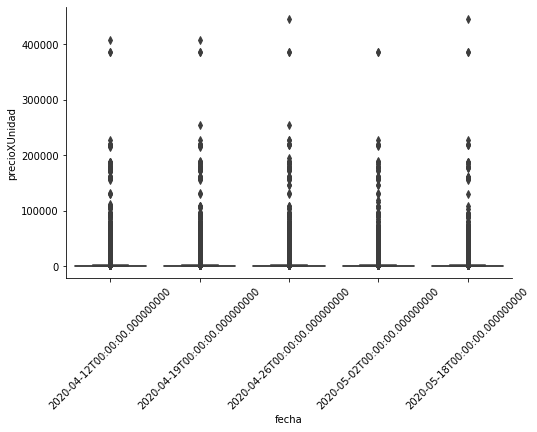

In [242]:
#Mostramos boxplot de precioXUnidad en cada fecha informada
plt.figure(figsize=(8,5))
p1=sns.boxplot(data=datasetNew_2,
                x='fecha', y='PrecioXUnidad')
plt.ylabel('precioXUnidad')
plt.xlabel('fecha')
plt.xticks(rotation=45)
sns.despine()

In [244]:
# Obtenemos un dataset de medias, desvios, mediana, q1 y q3 para fecha y producto (Agregue la mediana para poder di podía realizar el metodo Modified Z-score, pero es más efectivo el Z-score ). las columnas q1 y q3 sirven para calcular IRQ
df_product_mean_std=datasetNew_2[['fecha','producto_id','PrecioXUnidad']].groupby(['fecha','producto_id'],as_index=False).agg(['mean','median',pop_std,q_at(0.25) ,q_at(0.75)])
df_product_mean_std.columns = ['media','mediana','desvio','q1','q3']
df_product_mean_std = df_product_mean_std.reset_index()
df_product_mean_std.head()


,fecha,producto_id,media,mediana,desvio,q1,q3
0,2020-04-12,0000000001663,29.90,29.90,0.00,29.90,29.90
1,2020-04-12,0000000002288,34.90,34.90,5.00,32.40,37.40
2,2020-04-12,0000000205870,524.99,529.99,16.58,514.99,539.99
3,2020-04-12,0000000205894,589.99,589.99,0.00,589.99,589.99
4,2020-04-12,0000000205955,189.99,189.99,0.00,189.99,189.99


In [245]:
datasetNew_2=pd.merge(datasetNew_2,df_product_mean_std)

In [246]:
datasetNew_2['IQR']=datasetNew_2.q3-datasetNew_2.q1

In [247]:
#Identificamos los outliers utilizando el metodo IQR
outliers_iqr=datasetNew_2[((datasetNew_2.PrecioXUnidad < (datasetNew_2.q1 - 1.5 * datasetNew_2.IQR)) |(datasetNew_2.PrecioXUnidad > (datasetNew_2.q3 + 1.5 * datasetNew_2.IQR)))]
outliers_iqr.shape

(124217, 105)

In [248]:
outliers=datasetNew_2[(np.abs(datasetNew_2.PrecioXUnidad - datasetNew_2.media) > (3 * datasetNew_2.desvio))] 
outliers.shape

(16326, 105)

In [249]:
outliers[~outliers.producto_id.isin(outliers_iqr.producto_id)]

,precio,producto_id,sucursal_id,fecha,marca,nombre,presentacion,categoria1,categoria2,categoria3,cantidad,unidad,presentacion_depurada,um_depurada,cantidad_depurada,nombre_depurado,presentacion_en_nombre,factor_homogenea,um_homogenea_kg,um_homogenea_lt,um_homogenea_mt,um_homogenea_pack,um_homogenea_un,dummy_Chocolate,palabras_nombre,total_dummies,otras_palabras,marcas_frecuentes,algabo,alicante,arcor,carrefour,colgate,cooperativa,coto,dia,dove,glade,great_value,ilolay,issue,jumbo,knorr,la_anonima,la_paulina,la_serenisima,loreal,marolio,nivea,otras,paladini,pampers,pantene,primer_precio,sancor,sedal,ser,sin_marca,vea,comercioId,banderaId,banderaDescripcion,comercioRazonSocial,provincia,localidad,direccion,lat,lng,sucursalNombre,sucursalTipo,nom_provincia,region,nom_provincia_Catamarca,nom_provincia_Chaco,nom_provincia_Chubut,nom_provincia_Ciudad Autónoma de Buenos Aires,nom_provincia_Corrientes,nom_provincia_Córdoba,nom_provincia_Entre Ríos,nom_provincia_Formosa,nom_provincia_Jujuy,nom_provincia_La Pampa,nom_provincia_La Rioja,nom_provincia_Mendoza,nom_provincia_Misiones,nom_provincia_Neuquén,nom_provincia_Provincia de Buenos Aires,nom_provincia_Río Negro,nom_provincia_Salta,nom_provincia_San Juan,nom_provincia_San Luis,nom_provincia_Santa Cruz,nom_provincia_Santa Fe,nom_provincia_Santiago del Estero,nom_provincia_Tierra del Fuego,nom_provincia_Tucumán,precio_homogeneo,PrecioXUnidad,nuevaUnidad,media,mediana,desvio,q1,q3,IQR
79757,639.00,7790010616751,49-1-2,2020-04-12,carefree,Protectores Diarios Todos Los Dias Carefree 100 Un,100.0 un,NaN,NaN,NaN,100.00,un,100.0 un,un,100.00,Protectores Diarios Todos Los Dias Carefree Un,True,0.01,0.00,0.00,0.00,0.00,1.00,0.00,7.00,0.00,1.00,otras,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,49,1,Super Tuti1 y Super Tuti 3,ARNALDO P. APPELLA S.A.,AR-B,9 de Julio,Av. 25 De Mayo Y Garmendia 0,-35.44,-60.89,Super TUTI 3,Supermercado,Provincia de Buenos Aires,Centro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6.39,6.39,un,4.52,4.69,0.61,3.85,4.90,1.04
79759,639.00,7790010616751,50-1-2,2020-04-12,carefree,Protectores Diarios Todos Los Dias Carefree 100 Un,100.0 un,NaN,NaN,NaN,100.00,un,100.0 un,un,100.00,Protectores Diarios Todos Los Dias Carefree Un,True,0.01,0.00,0.00,0.00,0.00,1.00,0.00,7.00,0.00,1.00,otras,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50,1,Super Tuti2 y Super Todo,SUPERMERCADO TUTI 2 S.A.,AR-B,9 de Julio,Bartolome Mitre 917,-35.44,-60.88,Super Todo,Supermercado,Provincia de Buenos Aires,Centro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6.39,6.39,un,4.52,4.69,0.61,3.85,4.90,1.04
84161,50.00,7790040111004,16-1-1402,2020-04-12,chocolinas,Galletitas Sabor Chocolate Chocolinas 250 Gr,250.0 gr,NaN,NaN,NaN,250.00,gr,250.0 gr,gr,250.00,Galletitas Sabor Chocolate Chocolinas Gr,True,4.00,1.00,0.00,0.00,0.00,0.00,1.00,5.00,0.00,1.00,otras,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16,1,Hipermercado Libertad,Libertad S.A,AR-M,Godoy Cruz,Avda. Joaquín V. González Esq. Cipoletti None,-32.93,-68.86,Hipermercado Mendoza,Hipermercado,Mendoza,Cuyo,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,200.00,200.00,kg,323.32,336.00,38.91,283.71,355.70,71.99
106671,26.20,7790072179669,10-1-55,2020-04-12,celusal,Sal Fina Plus con Hierro Celusal 500 Gr,500.0 gr,NaN,NaN,NaN,500.00,gr,500.0 gr,gr,500.00,Sal Fina Plus Hierro Celusal Gr,True,2.00,1.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,1.00,otras,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10,1,Hipermercado Carrefour,INC S.A.,AR-P,Formosa,Av. Gustnisky 2040,-26.19,-58.19,Formosa La Rural,Hipermercado,Formosa,Norte G

In [250]:
datasetNew_2=datasetNew_2[(np.abs(datasetNew_2.PrecioXUnidad - datasetNew_2.media) <= (3 * datasetNew_2.desvio))] 

In [251]:
datasetNew_2=datasetNew_2[~((datasetNew_2.PrecioXUnidad < (datasetNew_2.q1 - 1.5 * datasetNew_2.IQR)) | (datasetNew_2.PrecioXUnidad > (datasetNew_2.q3 + 1.5 * datasetNew_2.IQR)))]
datasetNew_2.shape

(2072173, 105)

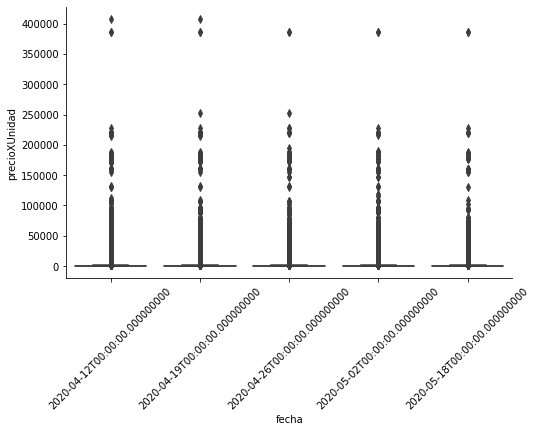

In [252]:
#Mostramos el boxplot con los datos de outliers ya eliminados
plt.figure(figsize=(8,5))
p1=sns.boxplot(data=datasetNew_2,
                x='fecha', y='PrecioXUnidad')
plt.ylabel('precioXUnidad')
plt.xlabel('fecha')
plt.xticks(rotation=45)
sns.despine()

Se analizaron nuevamente los outliers con el nuevo dataFrame depurada. Lo que se puede observar, es que la diferencia es mínima. Solamente se detectaron 2 registros de diferencia. Que antes se habían borrado y despúes de la depuración no se borraron.

### 8. Precio Relativo

In [253]:
prod_region_count = datasetNew_2.groupby(['producto_id','nom_provincia' ])['producto_id'].nunique().groupby('producto_id').count().reset_index(name='count')
bienNumerico=prod_region_count[(prod_region_count['count']==24)] 
bienNumerico.head()

,producto_id,count
129,0000077900067,24
150,0000077903501,24
299,0000077941824,24
389,0000077956262,24
499,0000078923454,24


In [254]:
#Producto utilizado para bien numerido 
#Verificamos si el bien numérico se encuentra entre los productos que se encuentran en todas las regiones
idProducto= '7793100111563'#'Crema Dental Interdental Colgate
bienNumerico[bienNumerico.producto_id==idProducto]

,producto_id,count
42671,7793100111563,24


In [255]:
datasetNew_2[datasetNew_2.producto_id==idProducto]

,precio,producto_id,sucursal_id,fecha,marca,nombre,presentacion,categoria1,categoria2,categoria3,cantidad,unidad,presentacion_depurada,um_depurada,cantidad_depurada,nombre_depurado,presentacion_en_nombre,factor_homogenea,um_homogenea_kg,um_homogenea_lt,um_homogenea_mt,um_homogenea_pack,um_homogenea_un,dummy_Chocolate,palabras_nombre,total_dummies,otras_palabras,marcas_frecuentes,algabo,alicante,arcor,carrefour,colgate,cooperativa,coto,dia,dove,glade,great_value,ilolay,issue,jumbo,knorr,la_anonima,la_paulina,la_serenisima,loreal,marolio,nivea,otras,paladini,pampers,pantene,primer_precio,sancor,sedal,ser,sin_marca,vea,comercioId,banderaId,banderaDescripcion,comercioRazonSocial,provincia,localidad,direccion,lat,lng,sucursalNombre,sucursalTipo,nom_provincia,region,nom_provincia_Catamarca,nom_provincia_Chaco,nom_provincia_Chubut,nom_provincia_Ciudad Autónoma de Buenos Aires,nom_provincia_Corrientes,nom_provincia_Córdoba,nom_provincia_Entre Ríos,nom_provincia_Formosa,nom_provincia_Jujuy,nom_provincia_La Pampa,nom_provincia_La Rioja,nom_provincia_Mendoza,nom_provincia_Misiones,nom_provincia_Neuquén,nom_provincia_Provincia de Buenos Aires,nom_provincia_Río Negro,nom_provincia_Salta,nom_provincia_San Juan,nom_provincia_San Luis,nom_provincia_Santa Cruz,nom_provincia_Santa Fe,nom_provincia_Santiago del Estero,nom_provincia_Tierra del Fuego,nom_provincia_Tucumán,precio_homogeneo,PrecioXUnidad,nuevaUnidad,media,mediana,desvio,q1,q3,IQR
320741,185.00,7793100111563,10-1-112,2020-04-12,colgate,Crema Dental Interdental Colgate 180 Gr,180.0 gr,NaN,NaN,NaN,180.00,gr,180.0 gr,gr,180.00,Crema Dental Interdental Colgate Gr,True,5.56,1.00,0.00,0.00,0.00,0.00,0.00,5.00,0.00,1.00,colgate,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10,1,Hipermercado Carrefour,INC S.A.,AR-A,Salta,20 De Febrero 37,-24.79,-65.41,Salta,Hipermercado,Salta,Norte Grande,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1027.86,1027.78,kg,949.16,947.47,109.07,871.75,1008.33,136.58
320742,191.00,7793100111563,10-1-142,2020-04-12,colgate,Crema Dental Interdental Colgate 180 Gr,180.0 gr,NaN,NaN,NaN,180.00,gr,180.0 gr,gr,180.00,Crema Dental Interdental Colgate Gr,True,5.56,1.00,0.00,0.00,0.00,0.00,0.00,5.00,0.00,1.00,colgate,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10,1,Hipermercado Carrefour,INC S.A.,AR-V,Río Grande,Av. San Martín 685,-53.79,-67.70,Río Grande,Supermercado,Tierra del Fuego,Patagonia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1061.20,1061.11,kg,949.16,947.47,109.07,871.75,1008.33,136.58
320743,168.00,7793100111563,10-1-147,2020-04-12,colgate,Crema Dental Interdental Colgate 180 Gr,180.0 gr,NaN,NaN,NaN,180.00,gr,180.0 gr,gr,180.00,Crema Dental Interdental Colgate Gr,True,5.56,1.00,0.00,0.00,0.00,0.00,0.00,5.00,0.00,1.00,colgate,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10,1,Hipermercado Carrefour,INC S.A.,AR-L,Santa Rosa,Avellaneda 151,-36.62,-64.29,Santa Rosa,Hipermercado,La Pampa,Centro,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,933.41,933.33,kg,949.16,947.47,109.07,871.75,1008.33,136.58
320744,151.00,7793100111563,10-1-149,2020-04-12,colgate,Crema Dental Interdental Colgate 180 Gr,180.0 gr,NaN,NaN,NaN,180.00,gr,180.0 gr,gr,180.00,Crema Dental Interdental Colgate Gr,True,5.56,1.00,0.00,0.00,0.00,0.00,0.00,5.00,0.00,1.00,colgate,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10,1,Hipermercado Carrefour,INC S.A.,AR-R,Bariloche,Moreno 909,-41.14,-71.30,Bariloche,Hipermercado,Río Negro,Patagonia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,838.96,838.89,kg,949.16,947.47,109.07,871.75,1008.33,136.58
320745,174.00,779310

In [257]:
#Armamos un dataset con la media de PrecioXUnidad por fecha y provincia del bien numerico seleccionado
dfbn=datasetNew_2[(datasetNew_2.producto_id==idProducto)][['fecha','nom_provincia','PrecioXUnidad']].groupby(['fecha','nom_provincia'],as_index=False).agg(['mean'])
dfbn.columns = ['bienNumerico']
dfbn = dfbn.reset_index()
dfbn

,fecha,nom_provincia,bienNumerico
0,2020-04-12,Catamarca,942.03
1,2020-04-12,Chaco,755.49
2,2020-04-12,Chubut,931.04
3,2020-04-12,Ciudad Autónoma de Buenos Aires,920.28
4,2020-04-12,Corrientes,890.28
5,2020-04-12,Córdoba,912.33
6,2020-04-12,Entre Ríos,981.67
7,2020-04-12,Formosa,978.89
8,2020-04-12,Jujuy,894.39
9,2020-04-12,La Pampa,933.33


In [258]:
#Agregamos al dataset una nueva columna con el precio relativo 
datasetPR=pd.merge(left=datasetNew_2,right=dfbn,how='inner',left_on=['fecha','nom_provincia'],right_on =['fecha','nom_provincia'])
datasetPR['precioRelativo']=datasetPR.PrecioXUnidad/datasetPR.bienNumerico
datasetPR.head()

,precio,producto_id,sucursal_id,fecha,marca,nombre,presentacion,categoria1,categoria2,categoria3,cantidad,unidad,presentacion_depurada,um_depurada,cantidad_depurada,nombre_depurado,presentacion_en_nombre,factor_homogenea,um_homogenea_kg,um_homogenea_lt,um_homogenea_mt,um_homogenea_pack,um_homogenea_un,dummy_Chocolate,palabras_nombre,total_dummies,otras_palabras,marcas_frecuentes,algabo,alicante,arcor,carrefour,colgate,cooperativa,coto,dia,dove,glade,great_value,ilolay,issue,jumbo,knorr,la_anonima,la_paulina,la_serenisima,loreal,marolio,nivea,otras,paladini,pampers,pantene,primer_precio,sancor,sedal,ser,sin_marca,vea,comercioId,banderaId,banderaDescripcion,comercioRazonSocial,provincia,localidad,direccion,lat,lng,sucursalNombre,sucursalTipo,nom_provincia,region,nom_provincia_Catamarca,nom_provincia_Chaco,nom_provincia_Chubut,nom_provincia_Ciudad Autónoma de Buenos Aires,nom_provincia_Corrientes,nom_provincia_Córdoba,nom_provincia_Entre Ríos,nom_provincia_Formosa,nom_provincia_Jujuy,nom_provincia_La Pampa,nom_provincia_La Rioja,nom_provincia_Mendoza,nom_provincia_Misiones,nom_provincia_Neuquén,nom_provincia_Provincia de Buenos Aires,nom_provincia_Río Negro,nom_provincia_Salta,nom_provincia_San Juan,nom_provincia_San Luis,nom_provincia_Santa Cruz,nom_provincia_Santa Fe,nom_provincia_Santiago del Estero,nom_provincia_Tierra del Fuego,nom_provincia_Tucumán,precio_homogeneo,PrecioXUnidad,nuevaUnidad,media,mediana,desvio,q1,q3,IQR,bienNumerico,precioRelativo
0,29.90,0000000001663,2-1-014,2020-04-12,la anonima,Radicheta Atada La Anonima 1 Un,1.0 un,NaN,NaN,NaN,1.00,un,1.0 un,un,1.00,Radicheta Atada La Anonima Un,True,1.00,0.00,0.00,0.00,0.00,1.00,0.00,5.00,0.00,1.00,la anonima,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,1,La Anonima,S.A. Importadora y Exportadora de la Patagonia,AR-U,Puerto Madryn,H.Yrigoyen 76,-42.76,-65.04,PUERTO MADRYN,Supermercado,Chubut,Patagonia,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29.90,29.90,un,29.90,29.90,0.00,29.90,29.90,0.00,931.04,0.03
1,185.80,0000042126560,11-5-1057,2020-04-12,nivea,Desodorante Atitranspirante Nivea Pearl & Beauty 43 Ml,40.0 ml,NaN,NaN,NaN,40.00,ml,40.0 ml,ml,40.00,Desodorante Atitranspirante Nivea Pearl Beauty Ml,True,25.00,0.00,1.00,0.00,0.00,0.00,0.00,6.00,0.00,1.00,nivea,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11,5,Walmart SuperCenter,Wal Mart Argentina S.R.L.,AR-U,COMODORO RIVADAVIA,Avenida Chile 350,-45.88,-67.53,Comodoro,Hipermercado,Chubut,Patagonia,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4645.00,4645.00,lt,4375.97,4293.12,336.48,4087.50,4555.00,467.50,931.04,4.99
2,269.10,0000042231486,11-5-1057,2020-04-12,nivea,Gel Exfoliante en Pomo Nivea Visage 75 Ml,75.0 ml,NaN,NaN,NaN,75.00,ml,75.0 ml,ml,75.00,Gel Exfoliante Pomo Nivea Visage Ml,True,13.33,0.00,1.00,0.00,0.00,0.00,0.00,6.00,0.00,1.00,nivea,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11,5,Walmart SuperCenter,Wal Mart Argentina S.R.L.,AR-U,COMODORO RIVADAVIA,Avenida Chile 350,-45.88,-67.53,Comodoro,Hipermercado,Chubut,Patagonia,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3587.91,3588.00,lt,3335.11,3260.00,357.03,3166.57,3526.33,359.77,931.04,3.85
3,499.00,0000042277132,10-1-45,2020-04-12,nivea,Desmaquillador de Ojos Bifasico en Botella Nivea 125 Ml,125.0 ml,NaN,NaN,NaN,125.00,ml,125.0 ml,ml,125.00,Desmaquillador Ojos Bifasico Botella Nivea Ml,True,8.00,0.00,1.00,0.00,0.00,0.00,0.00,6.00,0.00,1.00,nivea,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10,1,Hipermercado Carrefour,INC S.A.,AR-U,Trelew,25 De Mayo 1665,-43.26,-65.33,Trelew III,Supermercado,Chubut,Patagoni

In [259]:
datasetPR.shape

(2038897, 107)

In [260]:
len(datasetNew)-len(datasetPR)

33274

In [261]:
datasetPR[datasetPR.producto_id==idProducto]

,precio,producto_id,sucursal_id,fecha,marca,nombre,presentacion,categoria1,categoria2,categoria3,cantidad,unidad,presentacion_depurada,um_depurada,cantidad_depurada,nombre_depurado,presentacion_en_nombre,factor_homogenea,um_homogenea_kg,um_homogenea_lt,um_homogenea_mt,um_homogenea_pack,um_homogenea_un,dummy_Chocolate,palabras_nombre,total_dummies,otras_palabras,marcas_frecuentes,algabo,alicante,arcor,carrefour,colgate,cooperativa,coto,dia,dove,glade,great_value,ilolay,issue,jumbo,knorr,la_anonima,la_paulina,la_serenisima,loreal,marolio,nivea,otras,paladini,pampers,pantene,primer_precio,sancor,sedal,ser,sin_marca,vea,comercioId,banderaId,banderaDescripcion,comercioRazonSocial,provincia,localidad,direccion,lat,lng,sucursalNombre,sucursalTipo,nom_provincia,region,nom_provincia_Catamarca,nom_provincia_Chaco,nom_provincia_Chubut,nom_provincia_Ciudad Autónoma de Buenos Aires,nom_provincia_Corrientes,nom_provincia_Córdoba,nom_provincia_Entre Ríos,nom_provincia_Formosa,nom_provincia_Jujuy,nom_provincia_La Pampa,nom_provincia_La Rioja,nom_provincia_Mendoza,nom_provincia_Misiones,nom_provincia_Neuquén,nom_provincia_Provincia de Buenos Aires,nom_provincia_Río Negro,nom_provincia_Salta,nom_provincia_San Juan,nom_provincia_San Luis,nom_provincia_Santa Cruz,nom_provincia_Santa Fe,nom_provincia_Santiago del Estero,nom_provincia_Tierra del Fuego,nom_provincia_Tucumán,precio_homogeneo,PrecioXUnidad,nuevaUnidad,media,mediana,desvio,q1,q3,IQR,bienNumerico,precioRelativo
7719,156.00,7793100111563,10-1-45,2020-04-12,colgate,Crema Dental Interdental Colgate 180 Gr,180.0 gr,NaN,NaN,NaN,180.00,gr,180.0 gr,gr,180.00,Crema Dental Interdental Colgate Gr,True,5.56,1.00,0.00,0.00,0.00,0.00,0.00,5.00,0.00,1.00,colgate,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10,1,Hipermercado Carrefour,INC S.A.,AR-U,Trelew,25 De Mayo 1665,-43.26,-65.33,Trelew III,Supermercado,Chubut,Patagonia,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,866.74,866.67,kg,949.16,947.47,109.07,871.75,1008.33,136.58,931.04,0.93
7720,156.00,7793100111563,10-2-146,2020-04-12,colgate,Crema Dental Interdental Colgate 180 Gr,180.0 gr,NaN,NaN,NaN,180.00,gr,180.0 gr,gr,180.00,Crema Dental Interdental Colgate Gr,True,5.56,1.00,0.00,0.00,0.00,0.00,0.00,5.00,0.00,1.00,colgate,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10,2,Market,INC S.A.,AR-U,Trelew,9 De Julio 194,-43.25,-65.31,Trelew II,Supermercado,Chubut,Patagonia,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,866.74,866.67,kg,949.16,947.47,109.07,871.75,1008.33,136.58,931.04,0.93
7721,194.45,7793100111563,11-2-1108,2020-04-12,colgate,Crema Dental Interdental Colgate 180 Gr,180.0 gr,NaN,NaN,NaN,180.00,gr,180.0 gr,gr,180.00,Crema Dental Interdental Colgate Gr,True,5.56,1.00,0.00,0.00,0.00,0.00,0.00,5.00,0.00,1.00,colgate,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11,2,Changomas,Wal Mart Argentina S.R.L.,AR-U,PUERTO MADRYN,Avenida Juan B. Justo 1885,-42.78,-65.03,Puerto Madryn,Hipermercado,Chubut,Patagonia,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1080.36,1080.28,kg,949.16,947.47,109.07,871.75,1008.33,136.58,931.04,1.16
7722,175.48,7793100111563,11-5-1057,2020-04-12,colgate,Crema Dental Interdental Colgate 180 Gr,180.0 gr,NaN,NaN,NaN,180.00,gr,180.0 gr,gr,180.00,Crema Dental Interdental Colgate Gr,True,5.56,1.00,0.00,0.00,0.00,0.00,0.00,5.00,0.00,1.00,colgate,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11,5,Walmart SuperCenter,Wal Mart Argentina S.R.L.,AR-U,COMODORO RIVADAVIA,Avenida Chile 350,-45.88,-67.53,Comodoro,Hipermercado,Chubut,Patagonia,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,974.97,9

### 9. Adicional

Realizamoz un analisis de distribución de la información por rango

In [263]:
datasetNew_2['rango'] = pd.cut(datasetNew_2.PrecioXUnidad, bins= [0, 1500, 3000, 100000000], labels=["low", "medium", "high"], right=False)

In [264]:
datasetNew_2.isnull().sum().to_frame().sort_values(0, ascending = False).reset_index()

,index,0
0,categoria1,2072168
1,categoria2,2072168
2,categoria3,2072168
3,precio,0
4,sucursalNombre,0
5,nom_provincia_Entre Ríos,0
6,nom_provincia_Córdoba,0
7,nom_provincia_Corrientes,0
8,nom_provincia_Ciudad Autónoma de Buenos Aires,0
9,nom_provincia_Chubut,0


In [266]:
print("precio maximo segmento low %.f" % datasetNew_2[datasetNew_2.rango=='low'].PrecioXUnidad.max())
print("precio maximo segmento medium %.f" % datasetNew_2[datasetNew_2.rango=='medium'].PrecioXUnidad.max())
print("precio maximo segmento high %.f" % datasetNew_2[datasetNew_2.rango=='high'].PrecioXUnidad.max())

precio maximo segmento low 1500
precio maximo segmento medium 3000
precio maximo segmento high 407500


Realizamos un analisis de distribución de la información por cuartiles

In [268]:
quartiles = pd.qcut(datasetNew_2['PrecioXUnidad'], 4, labels=range(1,5))
datasetNew_2 = datasetNew_2.assign(quartil=quartiles.values)

In [ ]:
mpl.rc('figure', figsize=(10, 5))
for i in pd.Series(datasetNew_2.fecha.unique()).sort_values():
    dia = (datasetNew_2.fecha == i)
    datasetNewAux=datasetNew_2[dia]
    plot = pd.crosstab(index=datasetNewAux['region'],
            columns=datasetNewAux['quartil']
                  ).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='barh', stacked=True)
    plot.set_xlabel("Fecha {i}".format(i=i))
    plot.set_ylabel("Regiones")
    plot.legend(loc='center left',bbox_to_anchor=(1.0, 0.5),title='Quartil')

In [ ]:
mpl.rc('figure', figsize=(10, 5))
for i in pd.Series(datasetNew.fecha.unique()).sort_values():
    dia = (datasetNew.fecha == i)
    datasetNewAux=datasetNew[dia]
    plot = pd.crosstab(index=datasetNewAux['region'],
            columns=datasetNewAux['rango']
                  ).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='barh', stacked=True)
    plot.set_xlabel("Fecha {i}".format(i=i))
    plot.set_ylabel("Regiones")
    plot.legend(loc='center left',bbox_to_anchor=(1.0, 0.5),title='Rango')

### 10. Guardado de Dataset Limpio

In [ ]:
# Guardamos el dataset limpio
pd.to_pickle(precio_sucursal_producto_clean, 'precio_sucursal_producto_clean.pkl', compression="zip")